# HSMA Exercise

The data loaded in this exercise is for seven acute stroke units, and whether a patient receives clost-busting treatment for stroke.  There are lots of features, and a description of the features can be found in the file stroke_data_feature_descriptions.csv.

Train a Neural Network model to try to predict whether or not a stroke patient receives clot-busting treatment.  Use the prompts below to write each section of code.

How accurate can you get your model on the test set?

Calculate training and test set accuracy of your model.

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mac specific setup
import tensorflow as tf
# tf.config.list_physical_devices('GPU') uncomment to check a GPU is found
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


# sklearn for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# sklearn for model evaluation
from sklearn.model_selection import learning_curve
from sklearn.metrics import mutual_info_score

# TensorFlow sequential model
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

import json # For saving model outcomes
# Download data 
# (not required if running locally and have previously downloaded data)

download_required = False

if download_required:
    
    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '2004_titanic/master/jupyter_notebooks/data/hsma_stroke.csv'        
    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data to data subfolder
    data.to_csv(data_directory + 'hsma_stroke.csv', index=False)

# to read in from file:
if download_required == False:
    data = pd.read_csv('data/hsma_stroke.csv')

data = data.astype(float)
X = data.drop('Clotbuster given',axis=1) # X = all 'data' except the 'survived' column
y = data['Clotbuster given'] # y = 'survived' column from 'data'
# Convert to NumPy as required for k-fold splits
X_np = X.values
y_np = y.values

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np, test_size = 0.25, random_state=42)

results_file_path = 'experiment_results.jsonl'  # JSON Lines format


In [ ]:
def scale_data(X_train, X_test):
    """Scale data 0-1 based on min and max in training set"""
    
    # Initialise a new scaling object for normalising input data
    sc = MinMaxScaler()

    # Apply the scaler to the training and test sets
    train_sc = sc.fit_transform(X_train)
    test_sc = sc.fit_transform(X_test)
    
    return train_sc, test_sc

Plot training and test set accuracy over time during fitting.

In [ ]:
def calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test):
    """Calculate and print accuracy of training and test data fits"""    
    
    ### Get accuracy of fit to training data
    probability = model.predict(X_train_sc)
    y_pred_train = probability >= 0.5
    y_pred_train = y_pred_train.flatten()
    accuracy_train = np.mean(y_pred_train == y_train)
    
    ### Get accuracy of fit to test data
    probability = model.predict(X_test_sc)
    y_pred_test = probability >= 0.5
    y_pred_test = y_pred_test.flatten()
    accuracy_test = np.mean(y_pred_test == y_test)
  
    
    # Show accuracy
    print (f'Training accuracy {accuracy_train:0.3f}')
    print (f'Test accuracy {accuracy_test:0.3f}')
    return accuracy_test

    
def plot_training(history_dict, title = 'Training and validation accuracy'):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)

    fig, ax = plt.subplots()

    ax.set_xlabel('Time')
    ax.set_ylabel('Accuracy')

    ax.plot(epochs, acc_values, color='blue', label='Training acc')
    ax.plot(epochs, val_acc_values, color='red', label='Test accuracy')
    ax.set_title(title)
    
    ax.legend()

    fig.show()

Scale data before fitting the model.

In [ ]:
# Scale X data
X_train_sc, X_test_sc = scale_data(X_train, X_test)

In [ ]:
def make_net(number_features, 
            hidden_layers=3, 
            hidden_layer_neurones=128, 
            dropout=0.0, 
            learning_rate=0.003):
    
    """Make TensorFlow neural net"""
    
    # Clear Tensorflow 
    K.clear_session()
    
    # Set up neural net
    net = Sequential()
    
    # Add hidden hidden_layers using a loop
    for i in range(hidden_layers):
        # Add fully connected layer with ReLu activation
        net.add(Dense(
            hidden_layer_neurones, 
            input_dim=number_features,
            activation='relu'))
        # Add droput layer
        net.add(Dropout(dropout))
    
    # Add final sigmoid activation output
    net.add(Dense(1, activation='sigmoid'))    
    
    # Compiling model
    opt = Adam(learning_rate=learning_rate)
    
    net.compile(loss='binary_crossentropy', 
                optimizer=opt, 
                metrics=['accuracy'])
    
    return net

Now try different things in your model to improve test accuracy.  You might consider :
- Reducing overfitting if overfitting is a problem.
- Changing the number of hidden layers
- Changing the number of hidden neurons
- Changing batch size
- Changing dropout rate
- Changing the learning rate
- Changing the train / test split
- Trying stratified k-fold validation
- Dropping features

or more!

Tip : keep your analysis above as your base case.  Then below, just use the functions you've built to rebuild and retrain models with different parameters (or run altered versions of other cells below).  Don't forget, you need to build and train again before you get new outputs.

Add comments to your code to explain what you've changed, and change things a bit at a time (don't change everything all at once!)

/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-20 18:18:36.926901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/var/folders/cf/hfdshtps1bzbtzd3txx2ybmr0000gn/T/ipykernel_32581/507188142.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.869
Test accuracy 0.796


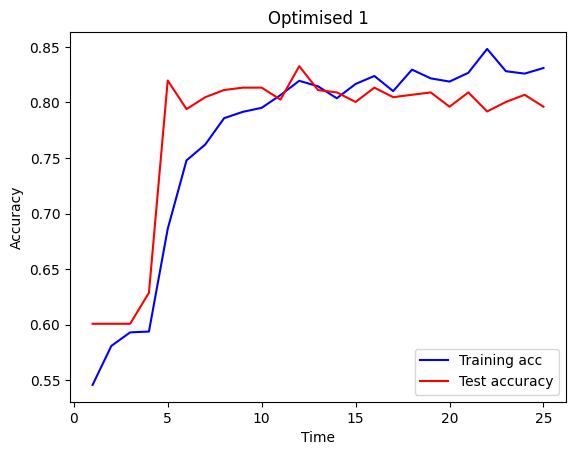

In [ ]:
# Define save checkpoint callback (only save if new best validation results)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.keras', save_best_only=True)

# Define early stopping callback
# Stop when no validation improvement for 25 epochs
# Restore weights to best validation accuracy
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=25, restore_best_weights=True)



# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features, 
                hidden_layers=5, 
                hidden_layer_neurones=64, 
                dropout=0.5, 
                learning_rate=0.003)

### Train model (and store training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=25,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

plot_training(history.history, title = "Optimised 1")

calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

model.save('clot_optimised1.keras')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/var/folders/cf/hfdshtps1bzbtzd3txx2ybmr0000gn/T/ipykernel_32581/507188142.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.855
Test accuracy 0.809


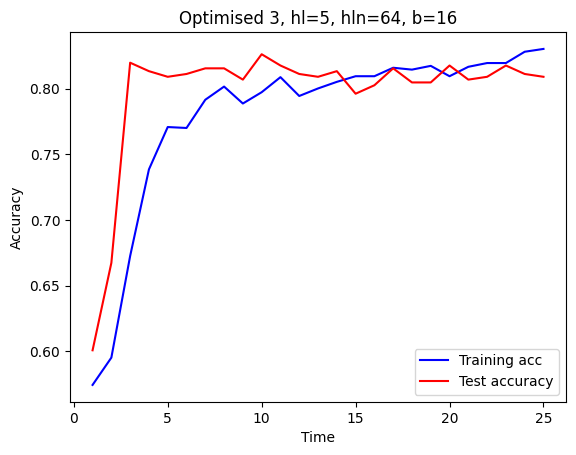

In [ ]:
# Parameters
epochs = 25
batch_size=16
hidden_layers=5 
hidden_layer_neurones=64
dropout=0.5
learning_rate=0.003

# Define save checkpoint callback (only save if new best validation results)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.keras', save_best_only=True)

# Define early stopping callback
# Stop when no validation improvement for 25 epochs
# Restore weights to best validation accuracy
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=25, restore_best_weights=True)



# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features, 
                hidden_layers=hidden_layers, 
                hidden_layer_neurones= hidden_layer_neurones, 
                dropout=dropout, 
                learning_rate=learning_rate)

### Train model (and store training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

plot_training(history.history, 
title = f"Optimised 3, hl={hidden_layers}, hln={hidden_layer_neurones}, b={batch_size}")

calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

model.save('clot_optimised3.keras')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/var/folders/cf/hfdshtps1bzbtzd3txx2ybmr0000gn/T/ipykernel_32581/507188142.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.857
Test accuracy 0.830


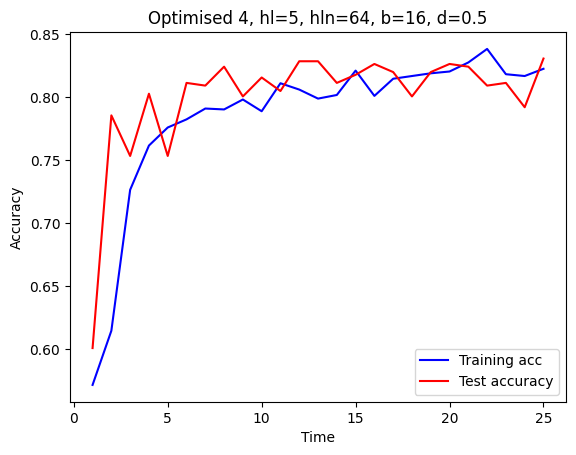

In [ ]:
# Parameters
epochs = 25
batch_size=16
hidden_layers=5 
hidden_layer_neurones=64
dropout=0.5
learning_rate=0.003

# Define save checkpoint callback (only save if new best validation results)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.keras', save_best_only=True)

# Define early stopping callback
# Stop when no validation improvement for 25 epochs
# Restore weights to best validation accuracy
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=25, restore_best_weights=True)



# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features, 
                hidden_layers=hidden_layers, 
                hidden_layer_neurones= hidden_layer_neurones, 
                dropout=dropout, 
                learning_rate=learning_rate)

### Train model (and store training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

plot_training(history.history, 
title = f"Optimised 4, hl={hidden_layers}, hln={hidden_layer_neurones}, b={batch_size}, d={dropout}")

calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

model.save('clot_optimised4.keras')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.842
Test accuracy 0.813


/var/folders/cf/hfdshtps1bzbtzd3txx2ybmr0000gn/T/ipykernel_32581/507188142.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.845
Test accuracy 0.798
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.852
Test accuracy 0.815
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.862
Test accuracy 0.824
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.851
Test accuracy 0.818
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.852
Test accuracy 0.805
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.867
Test accuracy 0.809
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.847
Test accuracy 0.796
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.866
Test accuracy 0.813
44/44 ━━━━━━━━━━━━━━━━━━

/var/folders/cf/hfdshtps1bzbtzd3txx2ybmr0000gn/T/ipykernel_32581/507188142.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.863
Test accuracy 0.818
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.867
Test accuracy 0.826
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.882
Test accuracy 0.822
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.863
Test accuracy 0.803
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.863
Test accuracy 0.822


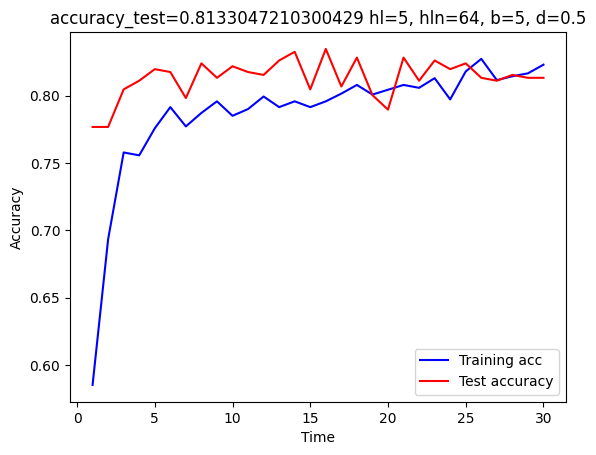

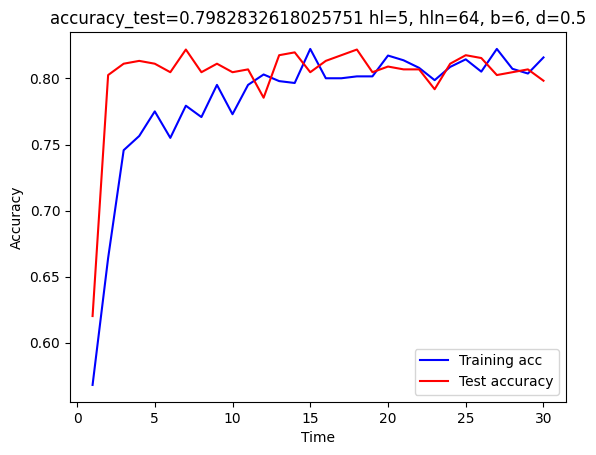

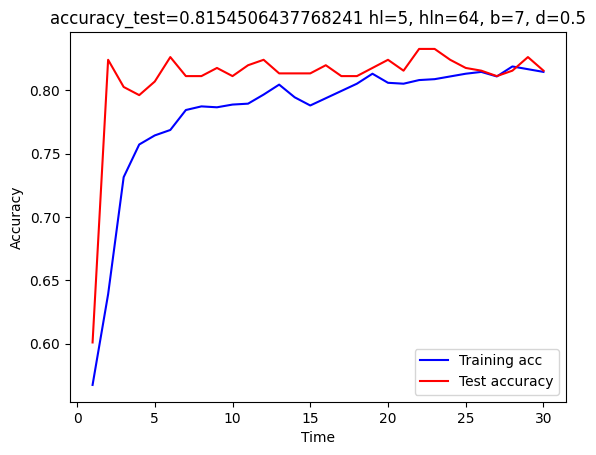

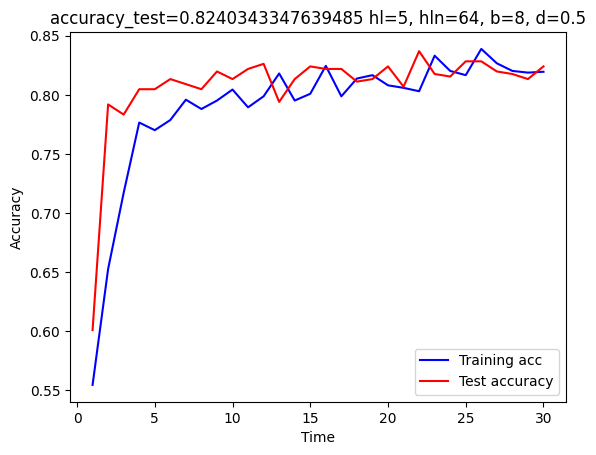

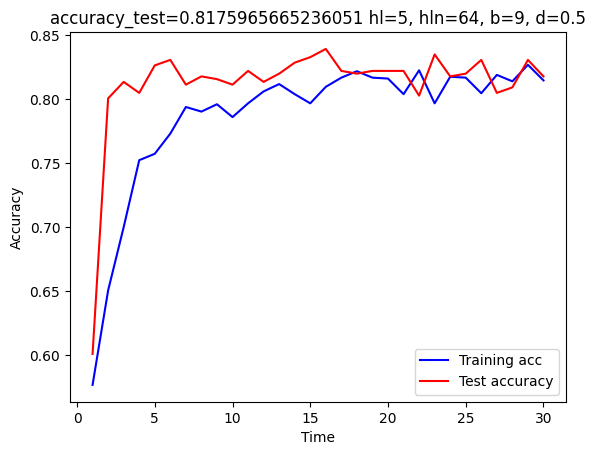

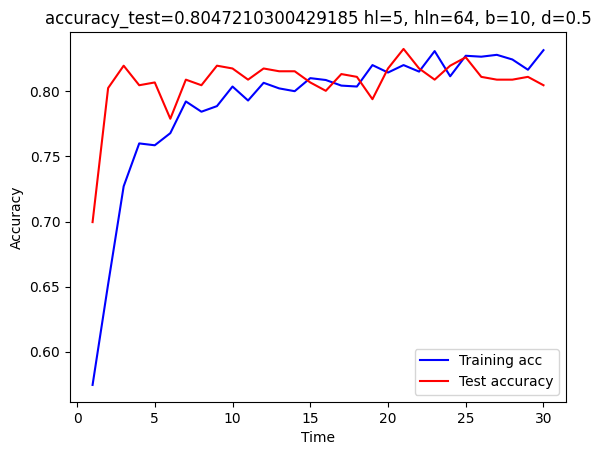

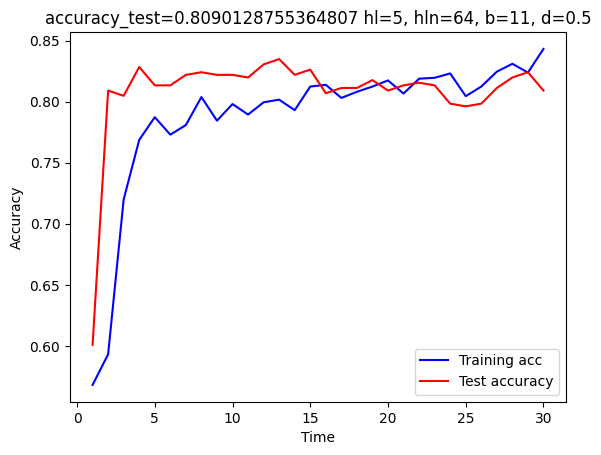

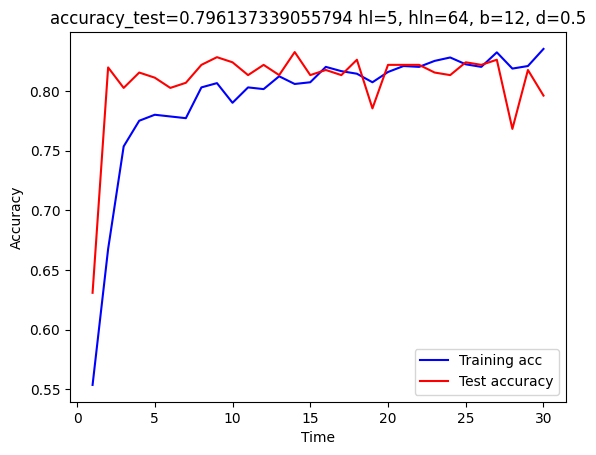

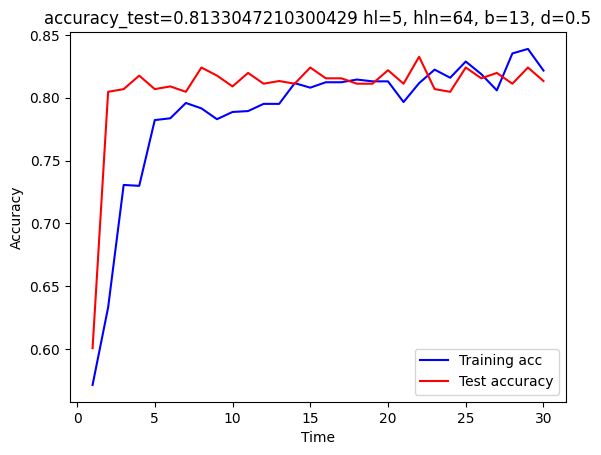

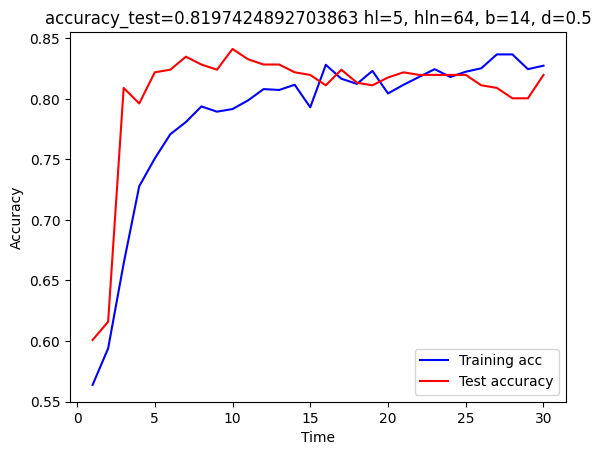

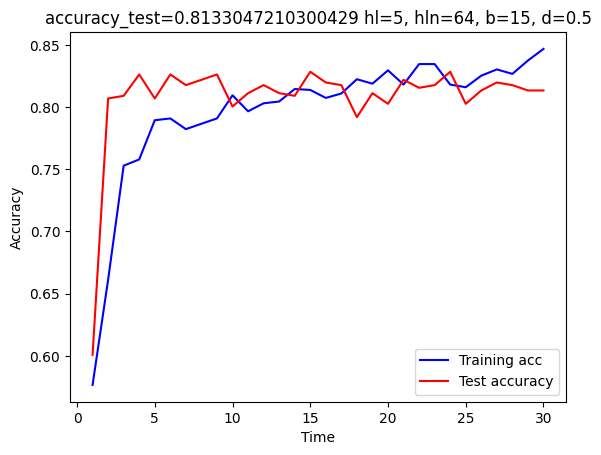

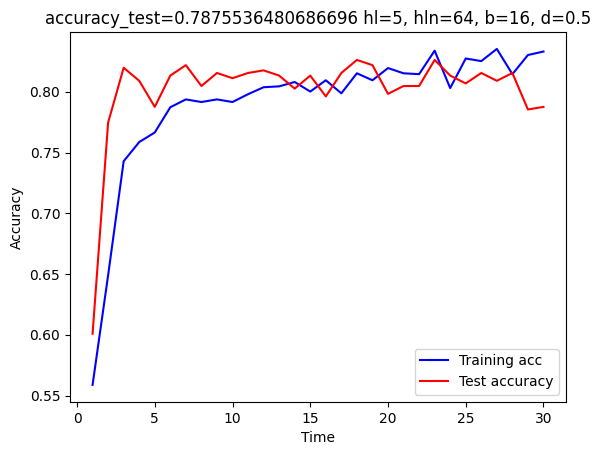

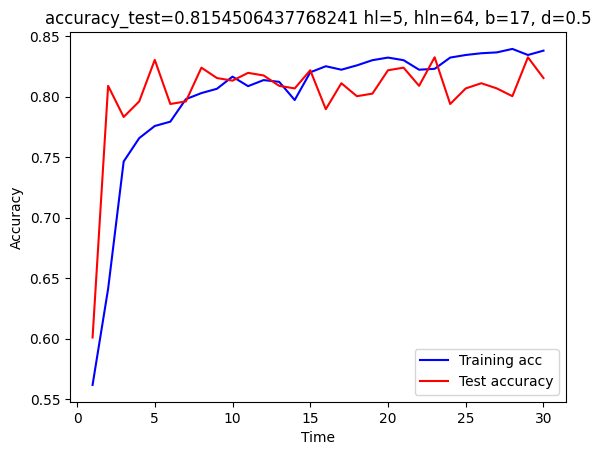

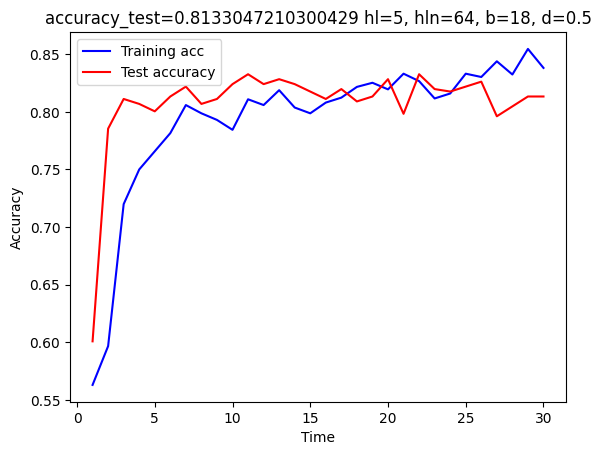

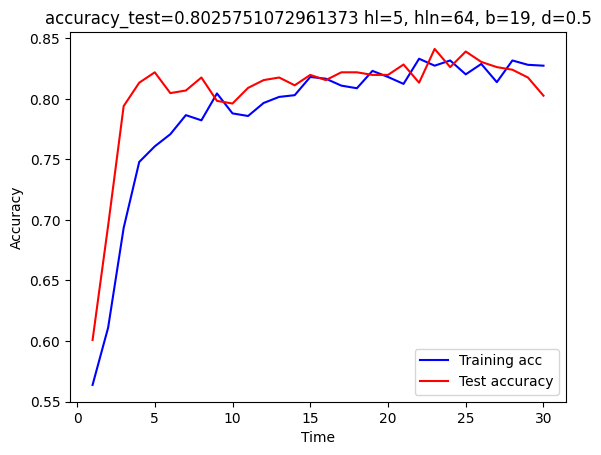

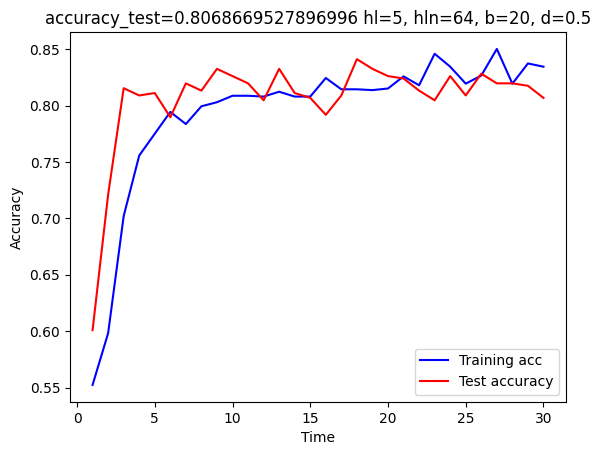

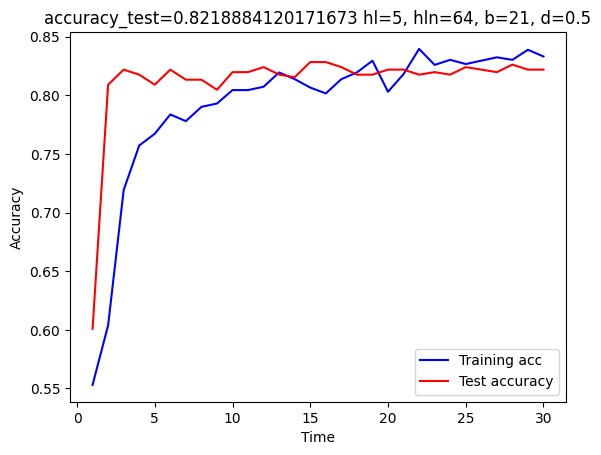

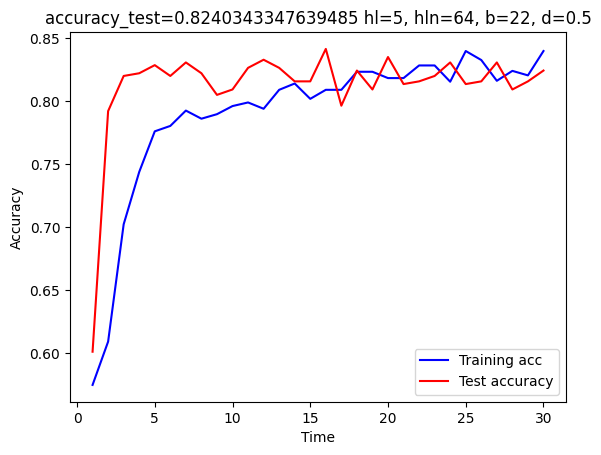

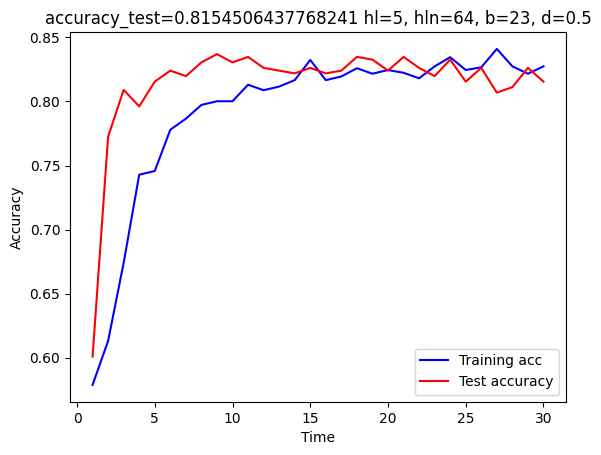

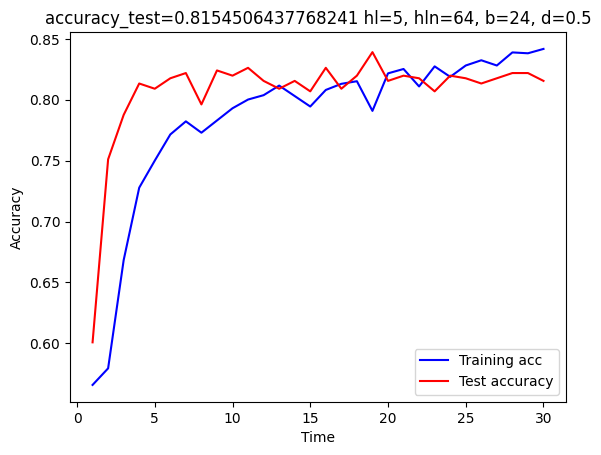

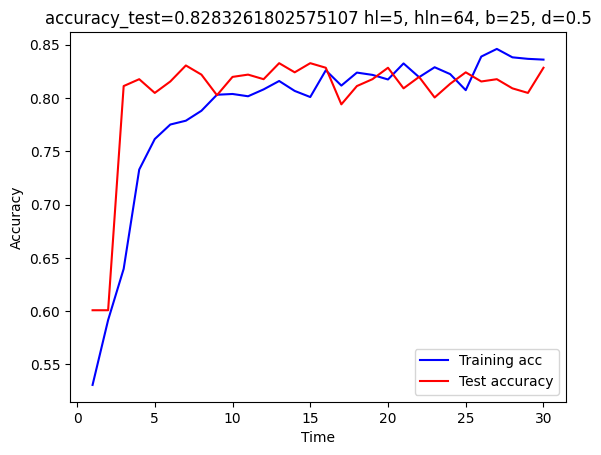

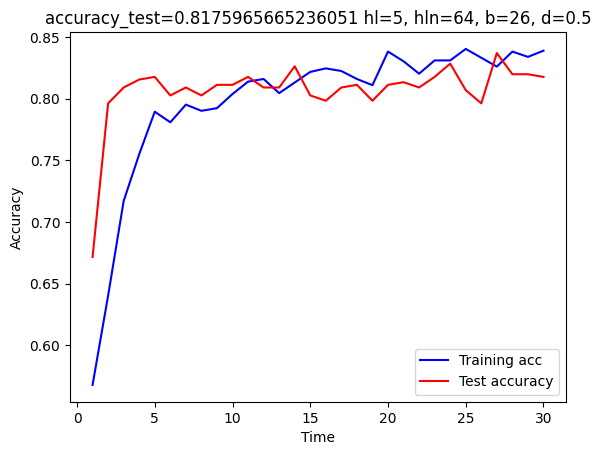

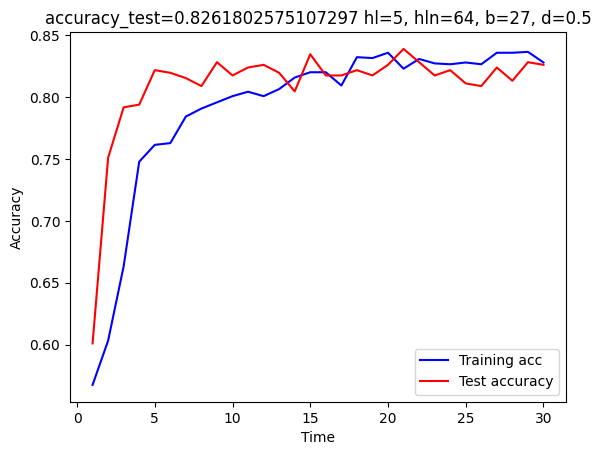

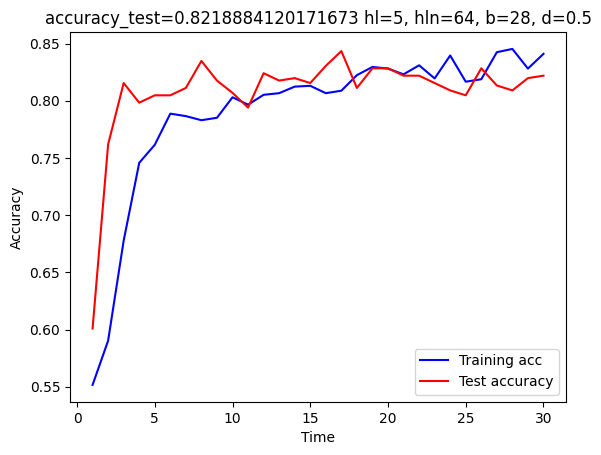

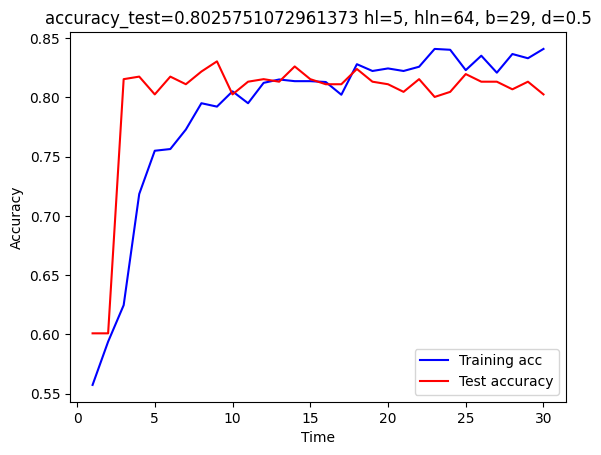

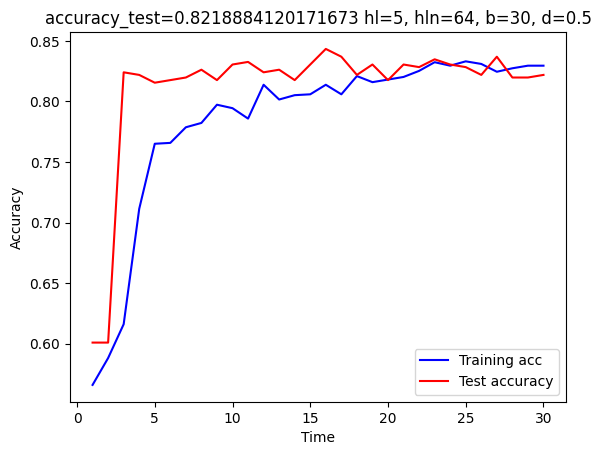

In [12]:
# Parameters
epochs = 30
batch_size=12
hidden_layers=5 
hidden_layer_neurones=64
dropout=0.5
learning_rate=0.003

# Define save checkpoint callback (only save if new best validation results)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.keras', save_best_only=True)

# Define early stopping callback
# Stop when no validation improvement for 25 epochs
# Restore weights to best validation accuracy
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=25, restore_best_weights=True)


for batch_size in range(5, 31):
# Define network
    number_features = X_train_sc.shape[1]
    model = make_net(number_features, 
                    hidden_layers=hidden_layers, 
                    hidden_layer_neurones= hidden_layer_neurones, 
                    dropout=dropout, 
                    learning_rate=learning_rate)

    ### Train model (and store training info in history)
    history = model.fit(X_train_sc,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_test_sc, y_test),
                        verbose=0)

    accuracy_test =  calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)
    plot_training(history.history, 
    title = f"accuracy_test={accuracy_test} hl={hidden_layers}, hln={hidden_layer_neurones}, b={batch_size}, d={dropout}")

   

   

The next cell will run for a very long time (days) but will crash eventually so the output is being saved to file. 

In [13]:
run_long_code = False

if run_long_code:
    # Parameters
    epochs = 30
    batch_size=30
    hidden_layers=5 
    hidden_layer_neurones=64
    dropout=0.5
    learning_rate=0.003

    # Define save checkpoint callback (only save if new best validation results)
    checkpoint_cb = keras.callbacks.ModelCheckpoint(
        'model_checkpoint.keras', save_best_only=True)

    # Define early stopping callback
    # Stop when no validation improvement for 25 epochs
    # Restore weights to best validation accuracy
    early_stopping_cb = keras.callbacks.EarlyStopping(
        patience=25, restore_best_weights=True)

    results = []

    for learning_rate in np.arange(0.001, 0.01, 0.001):
        for dropout in np.arange(0.1, 0.6, 0.1):
            for hidden_layer_neurones in range(16, 129, 16):
                for hidden_layers in range(1, 6):
                # Define network
                    number_features = X_train_sc.shape[1]
                    model = make_net(number_features, 
                                    hidden_layers=hidden_layers, 
                                    hidden_layer_neurones= hidden_layer_neurones, 
                                    dropout=dropout, 
                                    learning_rate=learning_rate)

                    ### Train model (and store training info in history)
                    history = model.fit(X_train_sc,
                                        y_train,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_data=(X_test_sc, y_test),
                                        verbose=0)

                    accuracy_test =  calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)
                    result ={
                        "learning_rate": learning_rate,
                        "dropout": dropout,
                        "hidden_layer_neurones": hidden_layer_neurones,
                        "hidden_layers": hidden_layers,
                        "batch_size": batch_size,
                        "accuracy_test": accuracy_test
                    }
                    results.append(result)
                    with open(results_file_path, 'a') as file:
                        json.dump(result, file)
                        file.write('\n')  # Newline for JSON Lines format

                

# results_sorted = sorted(results, key=lambda x: x["accuracy_test"], reverse=True)

# for result in results_sorted:
    # print(result)



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training accuracy 0.835
Test accuracy 0.828
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training accuracy 0.841
Test accuracy 0.833
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training accuracy 0.856
Test accuracy 0.826
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.850
Test accuracy 0.820
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training accuracy 0.867
Test accuracy 0.820
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training accuracy 0.840
Test accuracy 0.833
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training accuracy 0.863
Test accuracy 0.830
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training accuracy 0.901
Test accuracy 0.820
44/44 ━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

I am highly suspicious that we are overfitting by only using a training and test set without a validation set. I looked up ways of ttesting the maximimun accuracy that should be possible and will estimate. I will also implement k-fold cross validation to see if this "improves" the model.

This an example of how to estimate the maximum accuracy that should be possible using a synthetic dataset.

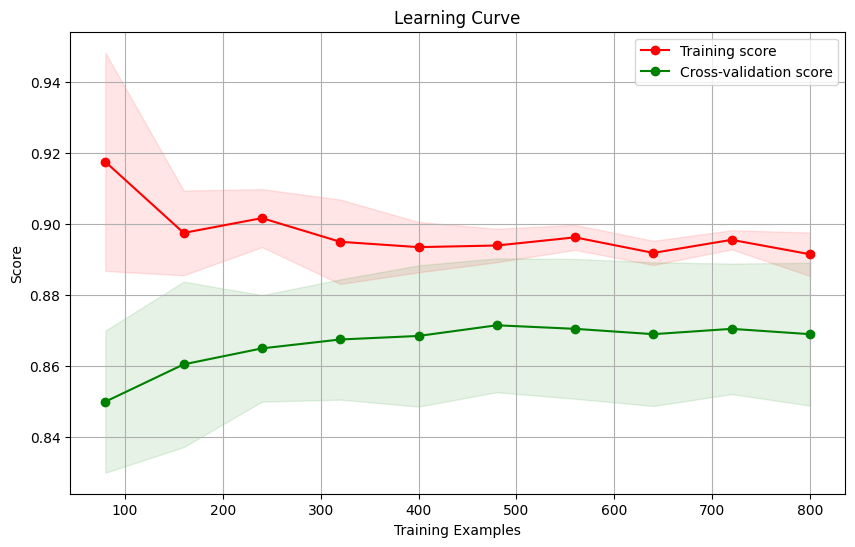

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

# Generate a sample dataset
X_d, y_d = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Define the estimator
estimator = SVC(kernel='rbf', random_state=42)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_d, y_d, cv=cv, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy"
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Now for my actual data. I will reimport in case the previous cell has changed the data in X, y.

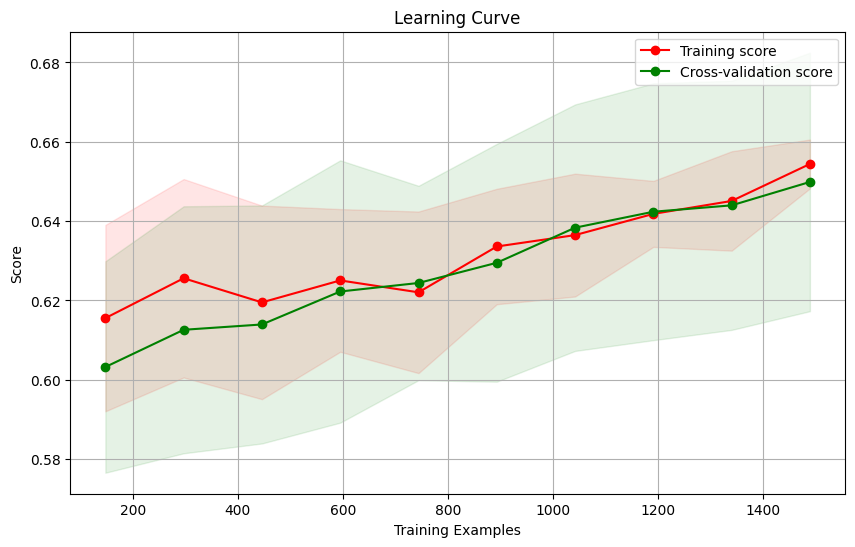

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit



data = pd.read_csv('./data/hsma_stroke.csv')
data = data.astype(float)
X = data.drop('Clotbuster given',axis=1) # X = all 'data' except the 'survived' column
y = data['Clotbuster given'] # y = 'survived' column from 'data'



# Define the estimator
estimator = SVC(kernel='rbf', random_state=42)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy"
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

And now for my data with our neural network using the best parameters I got from brute force - would adding extra data improve the model?

In [17]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from tensorflow.keras.models import clone_model
from tensorflow.keras.optimizers import Adam

def tf_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 5), 
                    cv=None, n_jobs=None, verbose=0):
    """
    Generate a learning curve for a TensorFlow/Keras model.
    
    Parameters:
    - estimator: A compiled Keras model
    - X: Input features
    - y: Target variable
    - train_sizes: Array of floats, relative training set sizes to evaluate
    - cv: Cross-validation splitting strategy
    - n_jobs: Number of jobs to run in parallel (not used in this implementation)
    - verbose: Verbosity mode
    
    Returns:
    - train_sizes_abs: Absolute training set sizes
    - train_scores: Training set scores for each training size
    - test_scores: Test set scores for each training size
    """
    if cv is None:
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    train_sizes_abs = np.round(train_sizes * len(X)).astype(int)
    train_scores = []
    test_scores = []
    
    # Get the current learning rate
    if isinstance(estimator.optimizer, Adam):
        current_lr = estimator.optimizer.learning_rate
        if hasattr(current_lr, 'numpy'):
            current_lr = current_lr.numpy()
        if isinstance(current_lr, np.float32):
            current_lr = float(current_lr)
    else:
        current_lr = 0.001  # default learning rate if not using Adam
    
    for train_size in train_sizes_abs:
        split_scores_train = []
        split_scores_test = []
        
        for train_index, test_index in cv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Use only a subset of the training data
            X_train_subset = X_train[:train_size]
            y_train_subset = y_train[:train_size]
            
            # Clone the model to reset its state
            model = clone_model(estimator)
            model.compile(loss='binary_crossentropy', 
                        optimizer=Adam(learning_rate=current_lr), 
                        metrics=['accuracy'])
            
            # Train the model
            history = model.fit(X_train_subset, y_train_subset, 
                                epochs=25, batch_size=32, 
                                validation_data=(X_test, y_test), 
                                verbose=0)
            
            # Evaluate the model
            train_score = model.evaluate(X_train_subset, y_train_subset, verbose=0)[1]
            test_score = model.evaluate(X_test, y_test, verbose=0)[1]
            
            split_scores_train.append(train_score)
            split_scores_test.append(test_score)
        
        train_scores.append(split_scores_train)
        test_scores.append(split_scores_test)
        
        if verbose:
            print(f"Finished training size: {train_size}")
    
    return train_sizes_abs, np.array(train_scores), np.array(test_scores)

I determined the best model from the brute force attempt by sorting the output file on accuracy.  I will now use this best model to predict the test set and calculate the accuracy.

Finished training size: 140
Finished training size: 279
Finished training size: 419
Finished training size: 558
Finished training size: 698
Finished training size: 838
Finished training size: 977
Finished training size: 1117
Finished training size: 1256
Finished training size: 1396


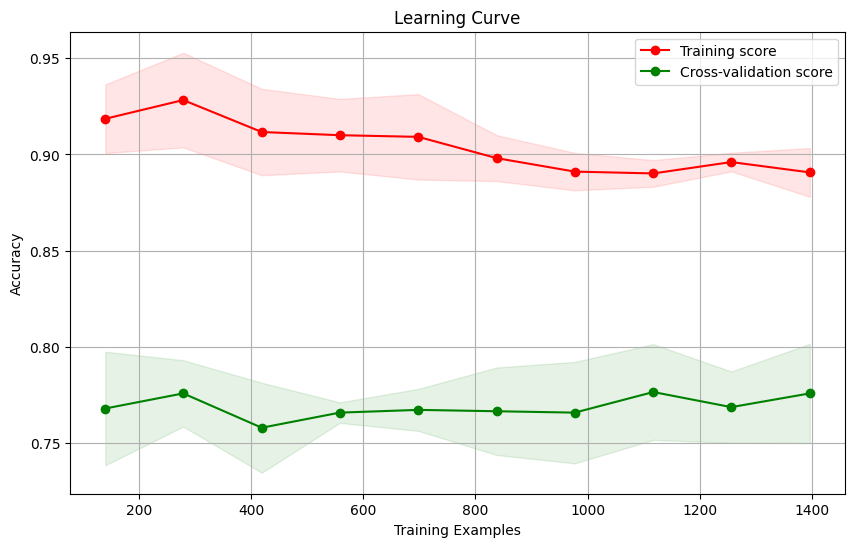

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import ShuffleSplit

# Load your data and preprocess it as you've done in your original code
# ... (your data loading and preprocessing code here)

# Load the best model
model = load_model('clot_optimised.keras')

# Generate the learning curve
train_sizes, train_scores, test_scores = tf_learning_curve(
    model, X_train_sc, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    verbose=1
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

From the above graph, the answer is that adding data probably wouldn't improve accuracy. 

## What is the likely final best accuracy of any model, given this data?

k-Nearest Neighbors Classifier for Estimating Maximum Accuracy

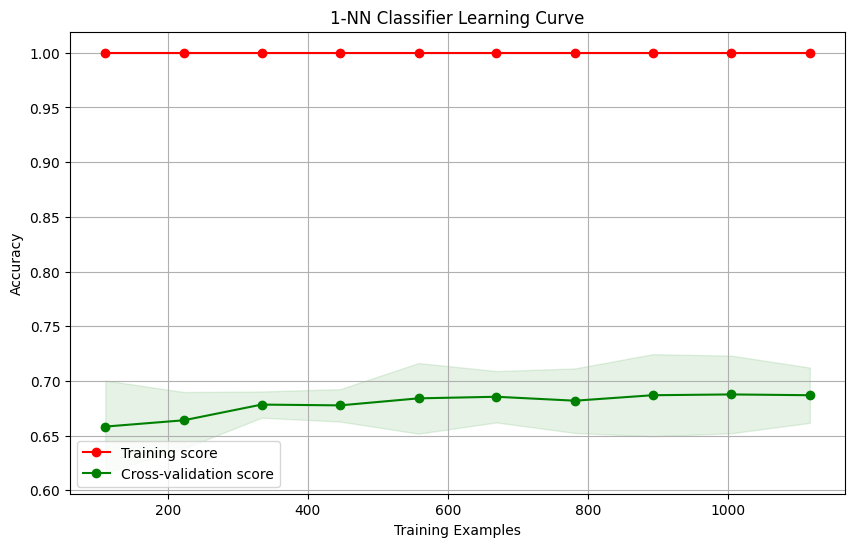

Estimated maximum accuracy: 0.69


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_knn_learning_curve(X, y, n_neighbors=1):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    train_sizes, train_scores, test_scores = learning_curve(
        knn, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(f"{n_neighbors}-NN Classifier Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()
    
    return test_scores_mean[-1]

# Usage
max_accuracy = plot_knn_learning_curve(X_train_sc, y_train, n_neighbors=1)
print(f"Estimated maximum accuracy: {max_accuracy:.2f}")

Ensemble Classifier for Estimating Maximum Accuracy

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np



def ensemble_accuracy_estimate(X, y):
    models = [
        RandomForestClassifier(n_estimators=100, random_state=42),
        GradientBoostingClassifier(n_estimators=100, random_state=42),
        SVC(probability=True, random_state=42),
        LogisticRegression(random_state=42), 
        KNeighborsClassifier(n_neighbors=1)
    ]
    
    scores = []
    for model in models:
        score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        scores.append(score.mean())
        print(f"Model: {model.__class__.__name__}, Accuracy: {score.mean():.3f}")
    
    return max(scores)

# Usage
max_accuracy = ensemble_accuracy_estimate(X_train_sc, y_train)
print(f"Estimated maximum accuracy: {max_accuracy:.2f}")

Model: RandomForestClassifier, Accuracy: 0.794
Model: GradientBoostingClassifier, Accuracy: 0.797
Model: SVC, Accuracy: 0.800
Model: LogisticRegression, Accuracy: 0.797
Model: KNeighborsClassifier, Accuracy: 0.686
Estimated maximum accuracy: 0.80


Mutual Information Calculation for Estimating Maximum Accuracy

In [41]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

def mutual_info_estimate(X, y):
    mi_scores = mutual_info_classif(X, y)
    total_mi = np.sum(mi_scores)
    max_accuracy = 0.5 + (total_mi / 2)  # Rough estimate
    return min(max_accuracy, 1.0)  # Cap at 1.0

# Usage
max_accuracy = mutual_info_estimate(X_train_sc, y_train)
print(f"Estimated maximum accuracy based on mutual information: {max_accuracy:.2f}")

Estimated maximum accuracy based on mutual information: 0.90


So it may be possible to get an accuracy of 0.87. I will now try to get this accuracy using a neural network and k-fold cross validation.


Fold 1


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 0.7857

Fold 2
Fold 2 accuracy: 0.7993

Fold 3
Fold 3 accuracy: 0.8029

Fold 4
Fold 4 accuracy: 0.7742

Fold 5
Fold 5 accuracy: 0.8065

Mean accuracy: 0.7937 (+/- 0.0120)


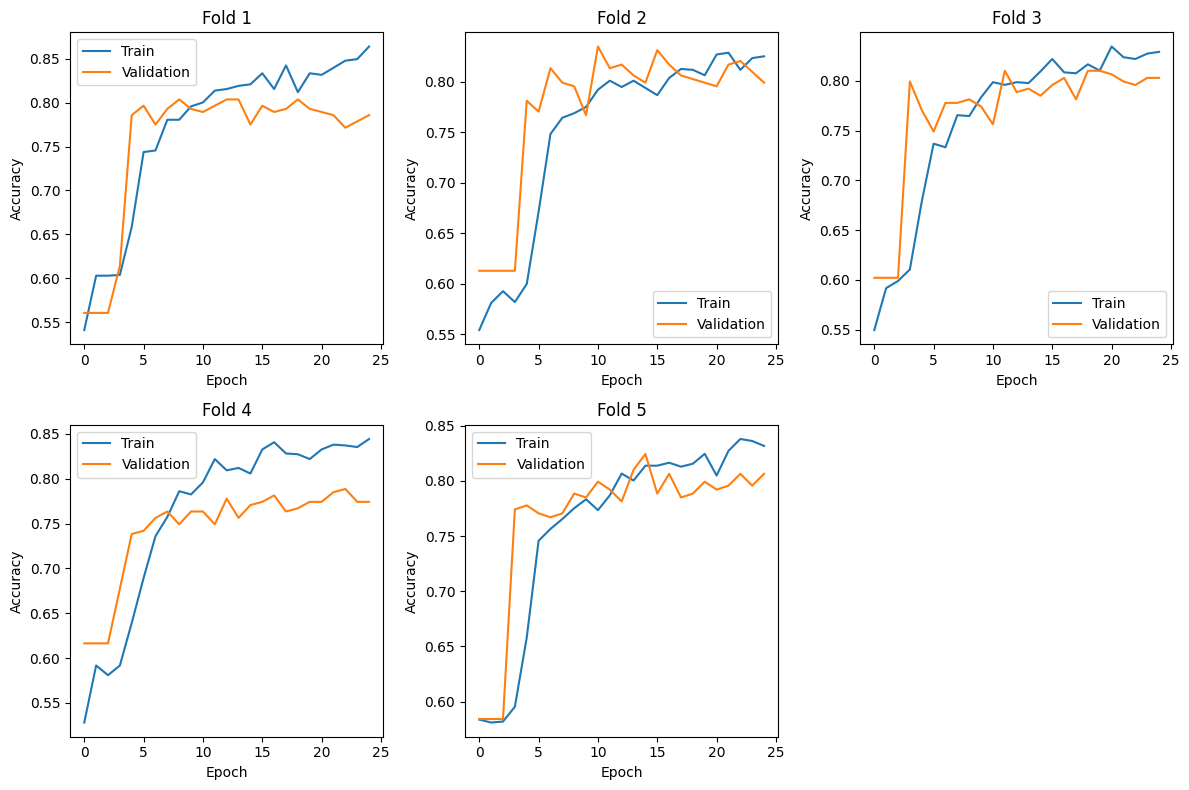

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

def create_model(input_dim, hidden_layers=5, hidden_layer_neurons=64, dropout=0.5, learning_rate=0.003):
    model = Sequential()
    
    # Input layer
    model.add(Dense(hidden_layer_neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout))
    
    # Hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_layer_neurons, activation='relu'))
        model.add(Dropout(dropout))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

def nn_kfold_cv(X, y, n_splits=5, epochs=25, batch_size=64, **model_params):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    histories = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y), 1):
        print(f'\nFold {fold}')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = create_model(input_dim=X.shape[1], **model_params)

        history = model.fit(X_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(X_val, y_val),
                            verbose=0)
        
        scores.append(model.evaluate(X_val, y_val, verbose=0)[1])
        histories.append(history)

        print(f'Fold {fold} accuracy: {scores[-1]:.4f}')

    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)
    print(f'\nMean accuracy: {mean_accuracy:.4f} (+/- {std_accuracy:.4f})')

    return scores, histories

# Usage
scores, histories = nn_kfold_cv(X_train_sc, y_train,
                                n_splits=5,
                                epochs=25,
                                batch_size=64,
                                hidden_layers=5,
                                hidden_layer_neurons=64,
                                dropout=0.5,
                                learning_rate=0.003)

# Plotting learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, history in enumerate(histories, 1):
    plt.subplot(2, 3, i)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Fold {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

Adding L2 regularisation: 


Testing with L2 lambda: 0.001

Fold 1


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 0.7536

Fold 2
Fold 2 accuracy: 0.7957

Fold 3
Fold 3 accuracy: 0.8029

Fold 4
Fold 4 accuracy: 0.7742

Fold 5
Fold 5 accuracy: 0.8100

Mean accuracy: 0.7873 (+/- 0.0207)


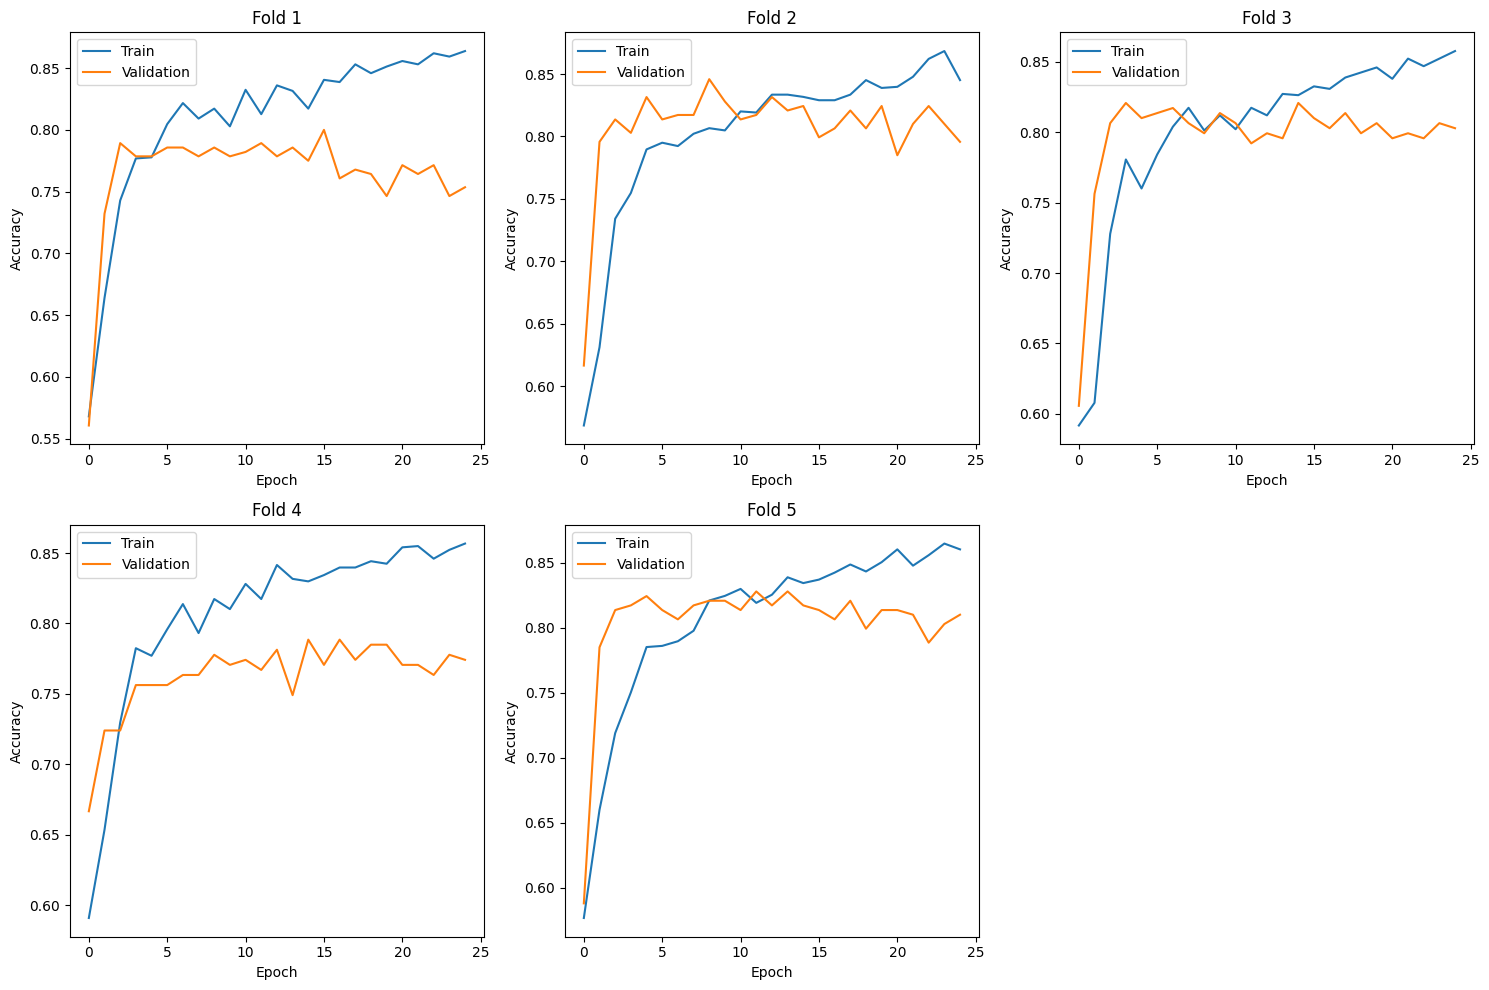


Testing with L2 lambda: 0.0005

Fold 1
Fold 1 accuracy: 0.7714

Fold 2
Fold 2 accuracy: 0.8315

Fold 3
Fold 3 accuracy: 0.7921

Fold 4
Fold 4 accuracy: 0.7778

Fold 5
Fold 5 accuracy: 0.8172

Mean accuracy: 0.7980 (+/- 0.0230)


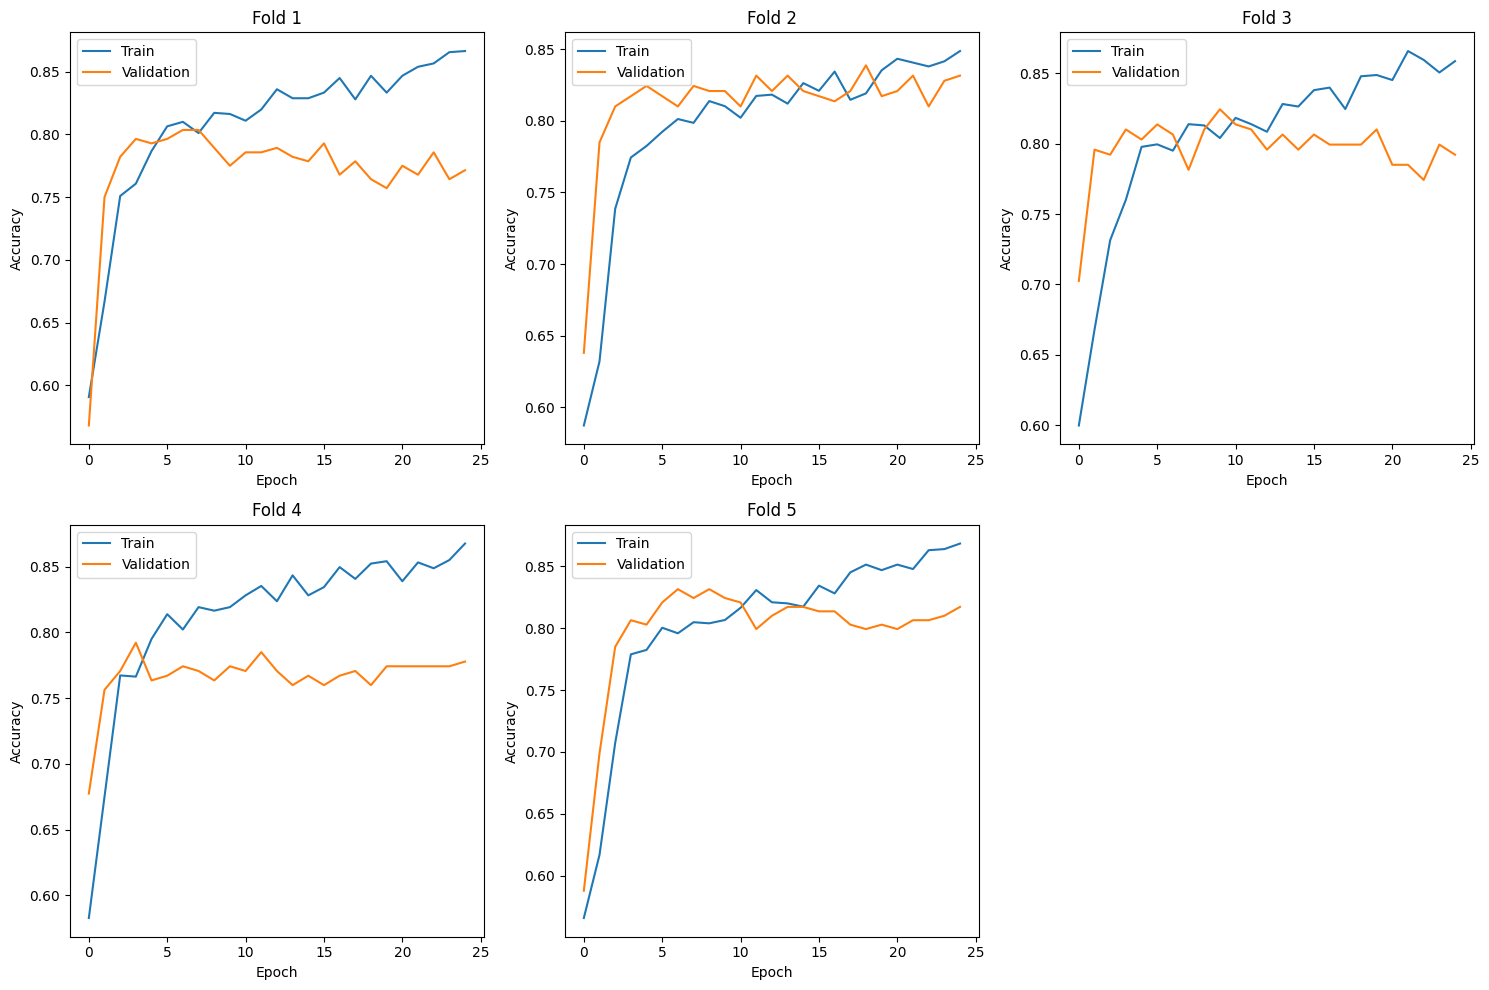


Testing with L2 lambda: 0.0001

Fold 1
Fold 1 accuracy: 0.7679

Fold 2
Fold 2 accuracy: 0.8029

Fold 3
Fold 3 accuracy: 0.7849

Fold 4
Fold 4 accuracy: 0.7706

Fold 5
Fold 5 accuracy: 0.8244

Mean accuracy: 0.7901 (+/- 0.0212)


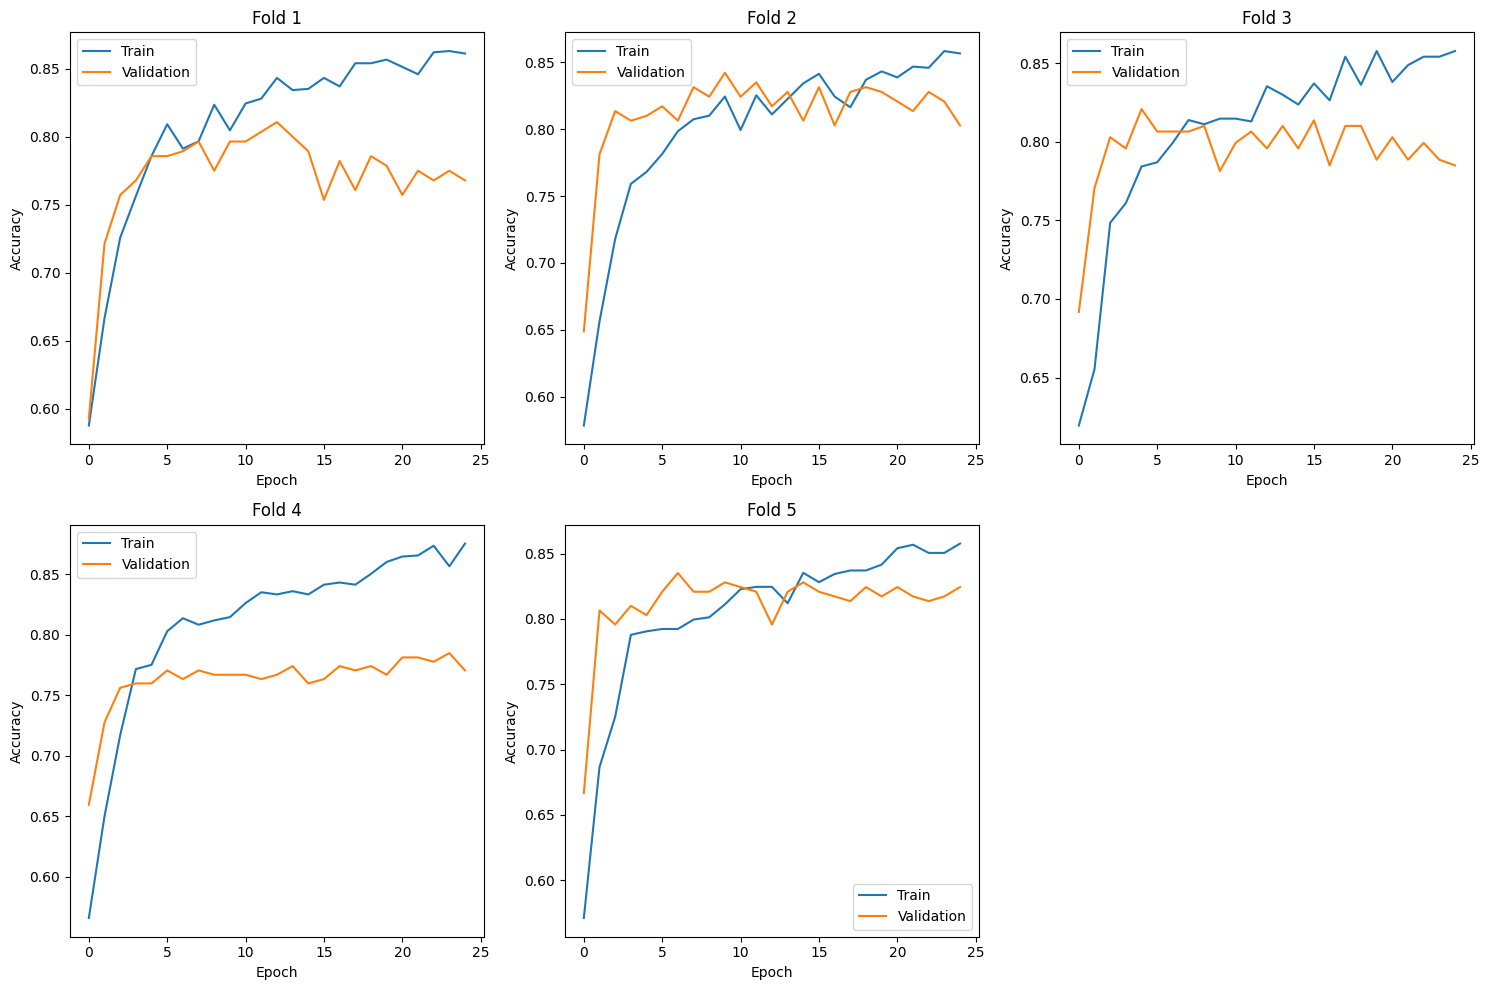

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import KFold
import numpy as np

learning_rate=0.001
dropout=0.4
hidden_layer_neurones=128
hidden_layers=4
batch_size=30
# "accuracy_test": 0.8497854077253219
l2_lambda_values = [0.001, 0.0005, 0.0001]

def create_model(input_dim, hidden_layers=5, hidden_layer_neurons=64, dropout=0.5, learning_rate=0.003, l2_lambda=0.0001):
    model = Sequential()
    
    # Input layer
    model.add(Dense(hidden_layer_neurons, input_dim=input_dim, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(Dropout(dropout))
    
    # Hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_layer_neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
        model.add(Dropout(dropout))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_lambda)))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

def nn_kfold_cv(X, y, n_splits=5, epochs=25, batch_size=64, **model_params):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    histories = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y), 1):
        print(f'\nFold {fold}')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = create_model(input_dim=X.shape[1], **model_params)

        history = model.fit(X_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(X_val, y_val),
                            verbose=0)
        
        scores.append(model.evaluate(X_val, y_val, verbose=0)[1])
        histories.append(history)

        print(f'Fold {fold} accuracy: {scores[-1]:.4f}')

    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)
    print(f'\nMean accuracy: {mean_accuracy:.4f} (+/- {std_accuracy:.4f})')

    return scores, histories




for l2_lambda in l2_lambda_values:
    print(f"\nTesting with L2 lambda: {l2_lambda}")
    scores, histories = nn_kfold_cv(X_train_sc, y_train,
                                    n_splits=5,
                                    hidden_layers=hidden_layers, hidden_layer_neurons=hidden_layer_neurones, dropout=dropout, 
                                    batch_size=30, 
                                    learning_rate=learning_rate, 
                                    l2_lambda=l2_lambda,
                                    epochs=25
                                    )
                                
    # Plotting learning curves

    plt.figure(figsize=(15, 10))
    for i, history in enumerate(histories, 1):
        plt.subplot(2, 3, i)
        plt.plot(history.history['accuracy'], label='Train')
        plt.plot(history.history['val_accuracy'], label='Validation')
        plt.title(f'Fold {i}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()


l2_lambda_values = [0.001, 0.0005, 0.0001]



Form above we got the best results with 0.005 compared to 0.001 or 0.0001, so I will use lambdas around 0.005 to see if any are better.


Testing with L2 lambda: 0.0003

Fold 1


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 0.7714

Fold 2
Fold 2 accuracy: 0.7921

Fold 3
Fold 3 accuracy: 0.7849

Fold 4
Fold 4 accuracy: 0.7563

Fold 5
Fold 5 accuracy: 0.7957

Mean accuracy: 0.7801 (+/- 0.0145)


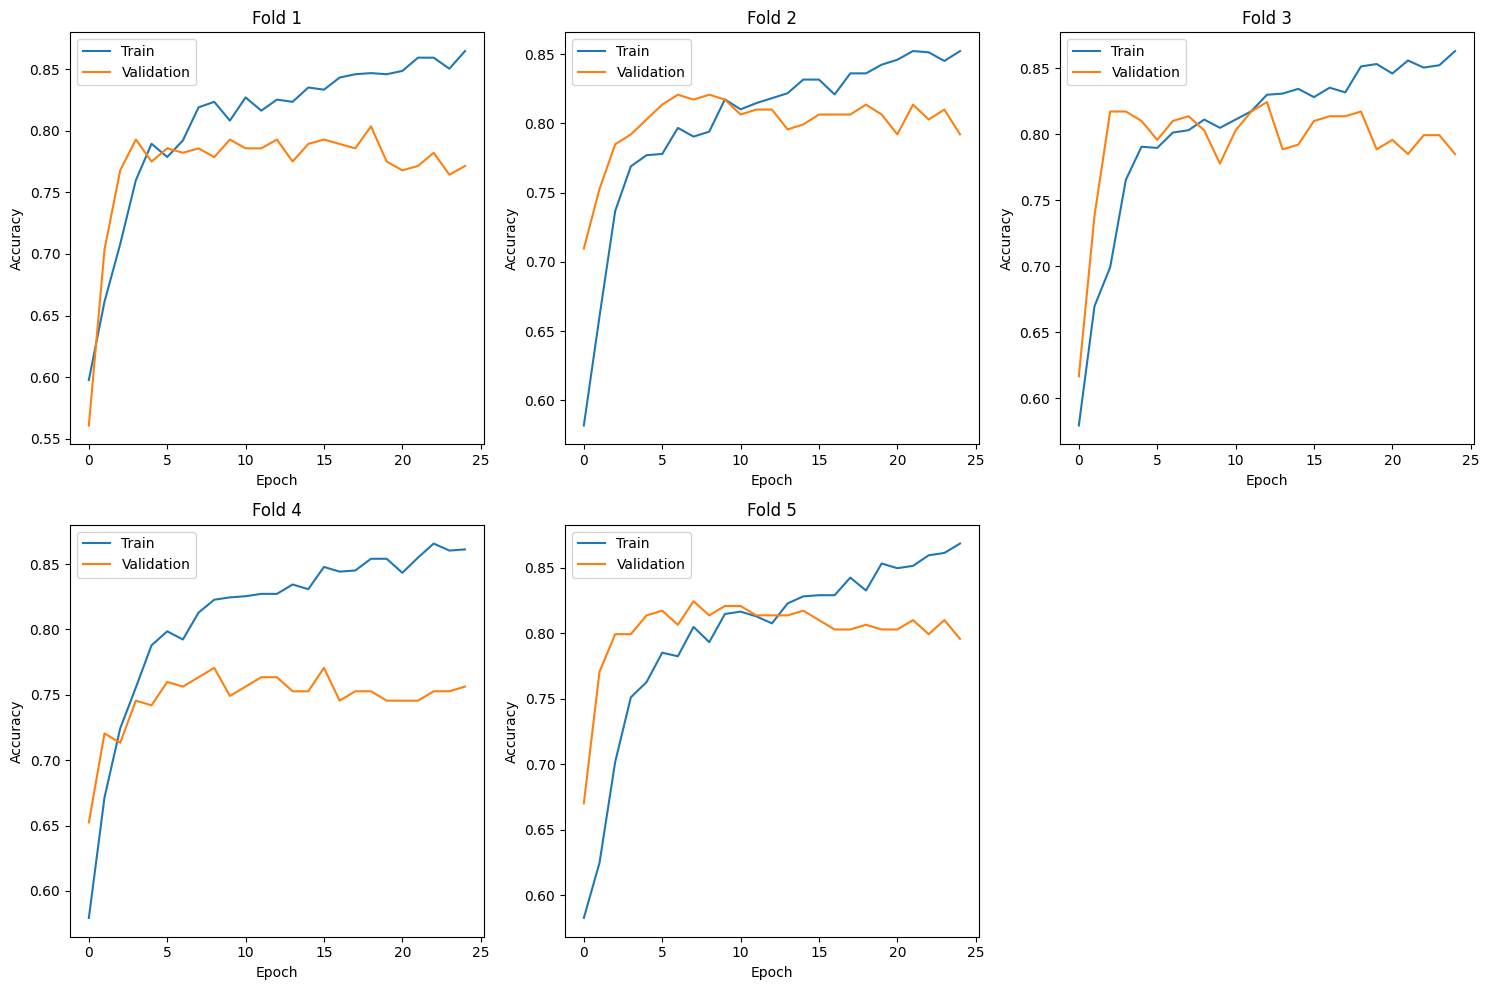


Testing with L2 lambda: 0.0005

Fold 1
Fold 1 accuracy: 0.7786

Fold 2
Fold 2 accuracy: 0.8100

Fold 3
Fold 3 accuracy: 0.8244

Fold 4
Fold 4 accuracy: 0.7921

Fold 5
Fold 5 accuracy: 0.7957

Mean accuracy: 0.8002 (+/- 0.0157)


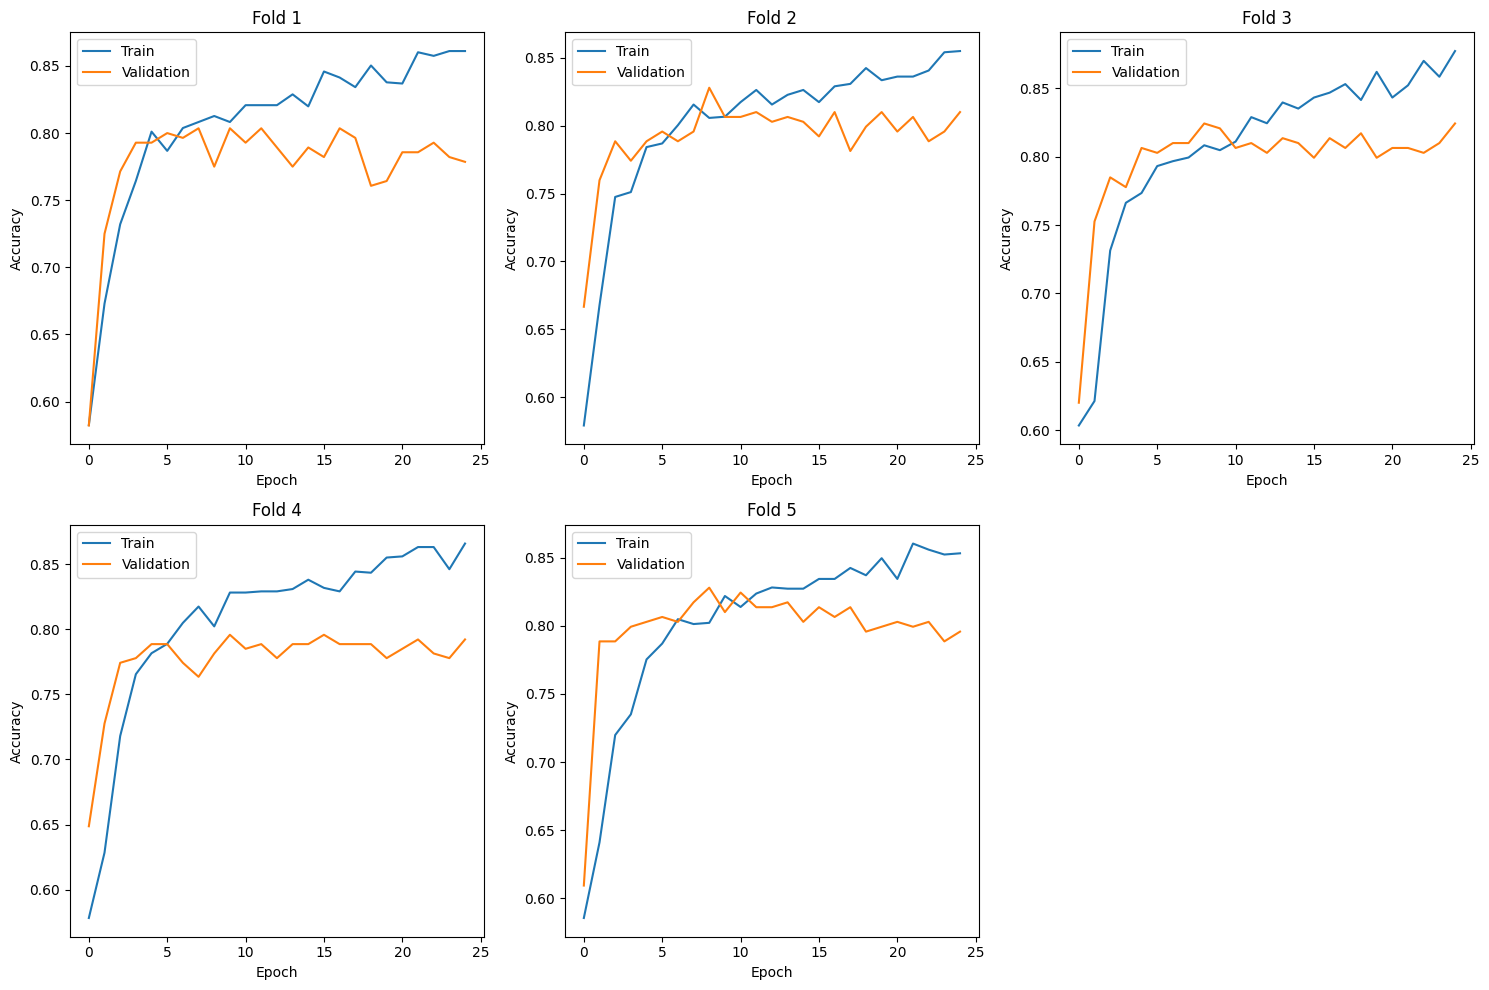


Testing with L2 lambda: 0.0007

Fold 1
Fold 1 accuracy: 0.7750

Fold 2
Fold 2 accuracy: 0.7957

Fold 3
Fold 3 accuracy: 0.7778

Fold 4
Fold 4 accuracy: 0.7706

Fold 5
Fold 5 accuracy: 0.8100

Mean accuracy: 0.7858 (+/- 0.0148)


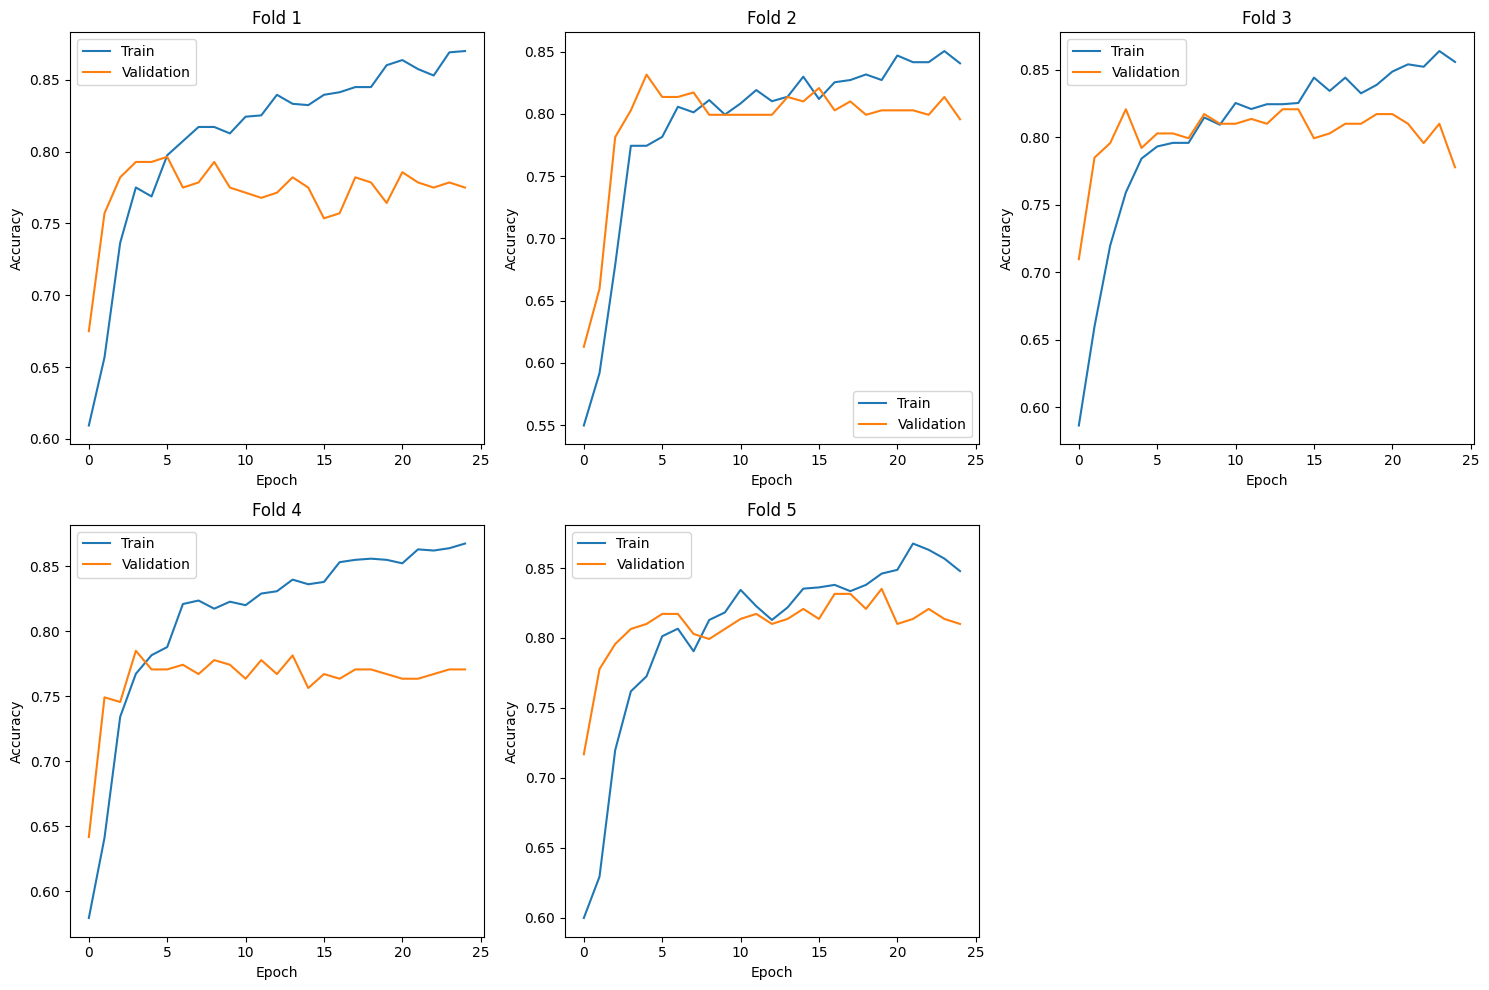

In [49]:




import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import KFold
import numpy as np

learning_rate=0.001
dropout=0.4
hidden_layer_neurones=128
hidden_layers=4
batch_size=30
# "accuracy_test": 0.8497854077253219
l2_lambda_values = [0.0003, 0.0005, 0.0007]

def create_model(input_dim, hidden_layers=5, hidden_layer_neurons=64, dropout=0.5, learning_rate=0.003, l2_lambda=0.0001):
    model = Sequential()
    
    # Input layer
    model.add(Dense(hidden_layer_neurons, input_dim=input_dim, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(Dropout(dropout))
    
    # Hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_layer_neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
        model.add(Dropout(dropout))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_lambda)))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

def nn_kfold_cv(X, y, n_splits=5, epochs=25, batch_size=64, **model_params):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    histories = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y), 1):
        print(f'\nFold {fold}')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = create_model(input_dim=X.shape[1], **model_params)

        history = model.fit(X_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(X_val, y_val),
                            verbose=0)
        
        scores.append(model.evaluate(X_val, y_val, verbose=0)[1])
        histories.append(history)

        print(f'Fold {fold} accuracy: {scores[-1]:.4f}')

    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)
    print(f'\nMean accuracy: {mean_accuracy:.4f} (+/- {std_accuracy:.4f})')

    return scores, histories




for l2_lambda in l2_lambda_values:
    print(f"\nTesting with L2 lambda: {l2_lambda}")
    scores, histories = nn_kfold_cv(X_train_sc, y_train,
                                    n_splits=5,
                                    hidden_layers=hidden_layers, hidden_layer_neurons=hidden_layer_neurones, dropout=dropout, 
                                    batch_size=30, 
                                    learning_rate=learning_rate, 
                                    l2_lambda=l2_lambda,
                                    epochs=25
                                    )
                                
    # Plotting learning curves

    plt.figure(figsize=(15, 10))
    for i, history in enumerate(histories, 1):
        plt.subplot(2, 3, i)
        plt.plot(history.history['accuracy'], label='Train')
        plt.plot(history.history['val_accuracy'], label='Validation')
        plt.title(f'Fold {i}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()






0.0005 is still the best, 0.0007 second best and 0.0003 third best. I will now try 0.00055.0.0006, 0.00065


Testing with L2 lambda: 0.0005

Fold 1


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 0.7750

Fold 2
Fold 2 accuracy: 0.8172

Fold 3
Fold 3 accuracy: 0.7921

Fold 4
Fold 4 accuracy: 0.7706

Fold 5
Fold 5 accuracy: 0.7921

Mean accuracy: 0.7894 (+/- 0.0164)


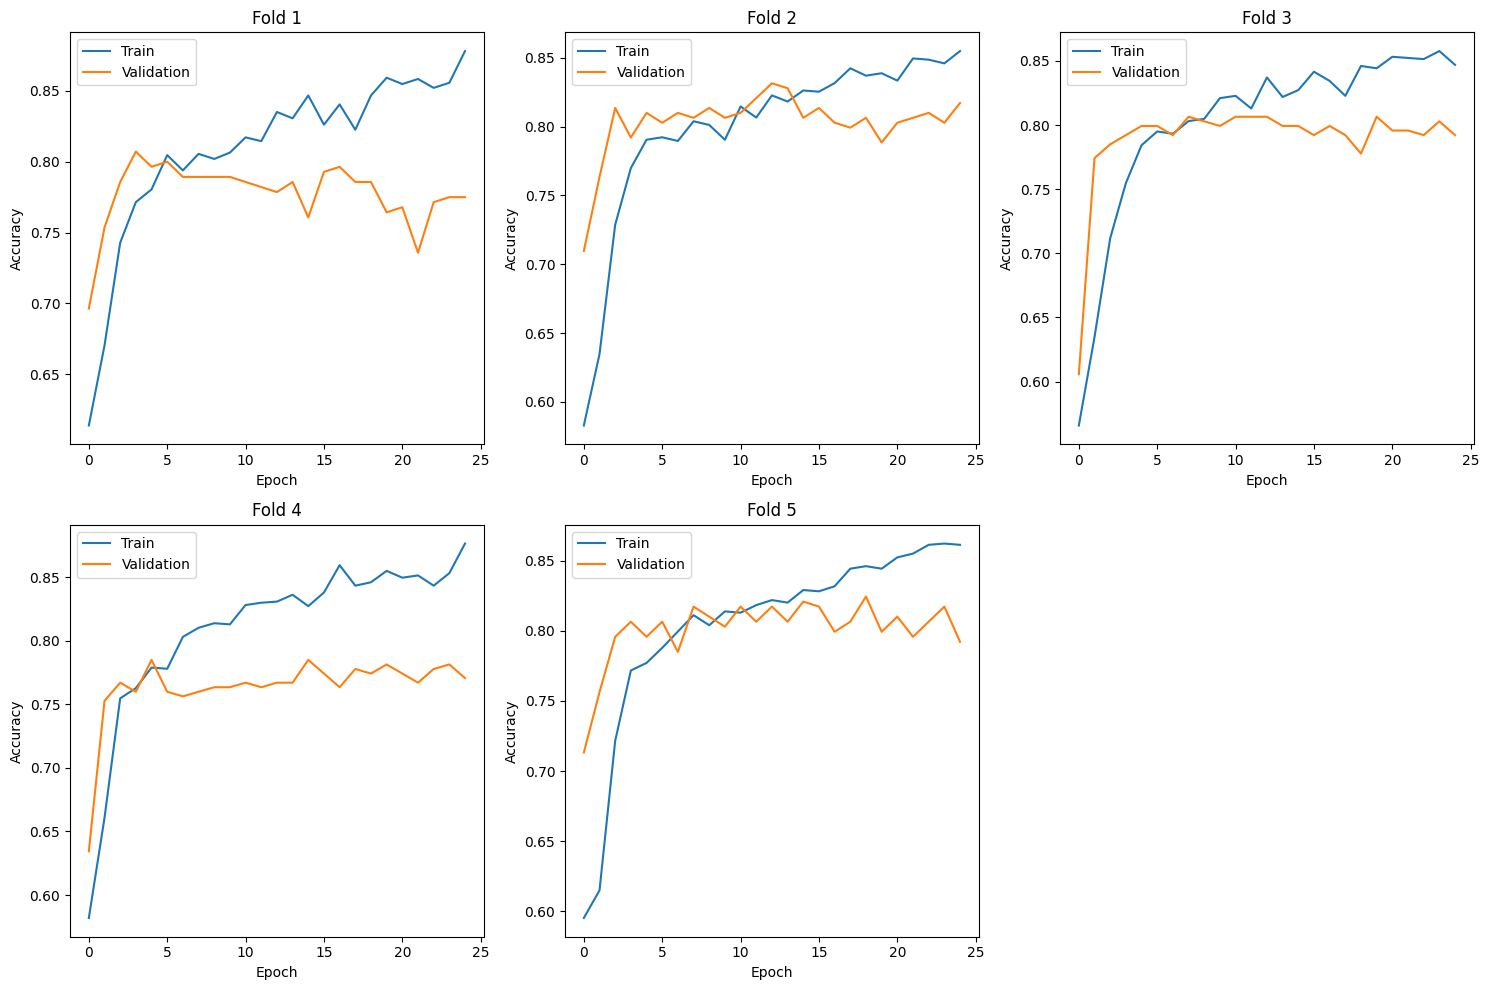


Testing with L2 lambda: 0.00055

Fold 1
Fold 1 accuracy: 0.7464

Fold 2
Fold 2 accuracy: 0.8244

Fold 3
Fold 3 accuracy: 0.7993

Fold 4
Fold 4 accuracy: 0.7814

Fold 5
Fold 5 accuracy: 0.8029

Mean accuracy: 0.7909 (+/- 0.0261)


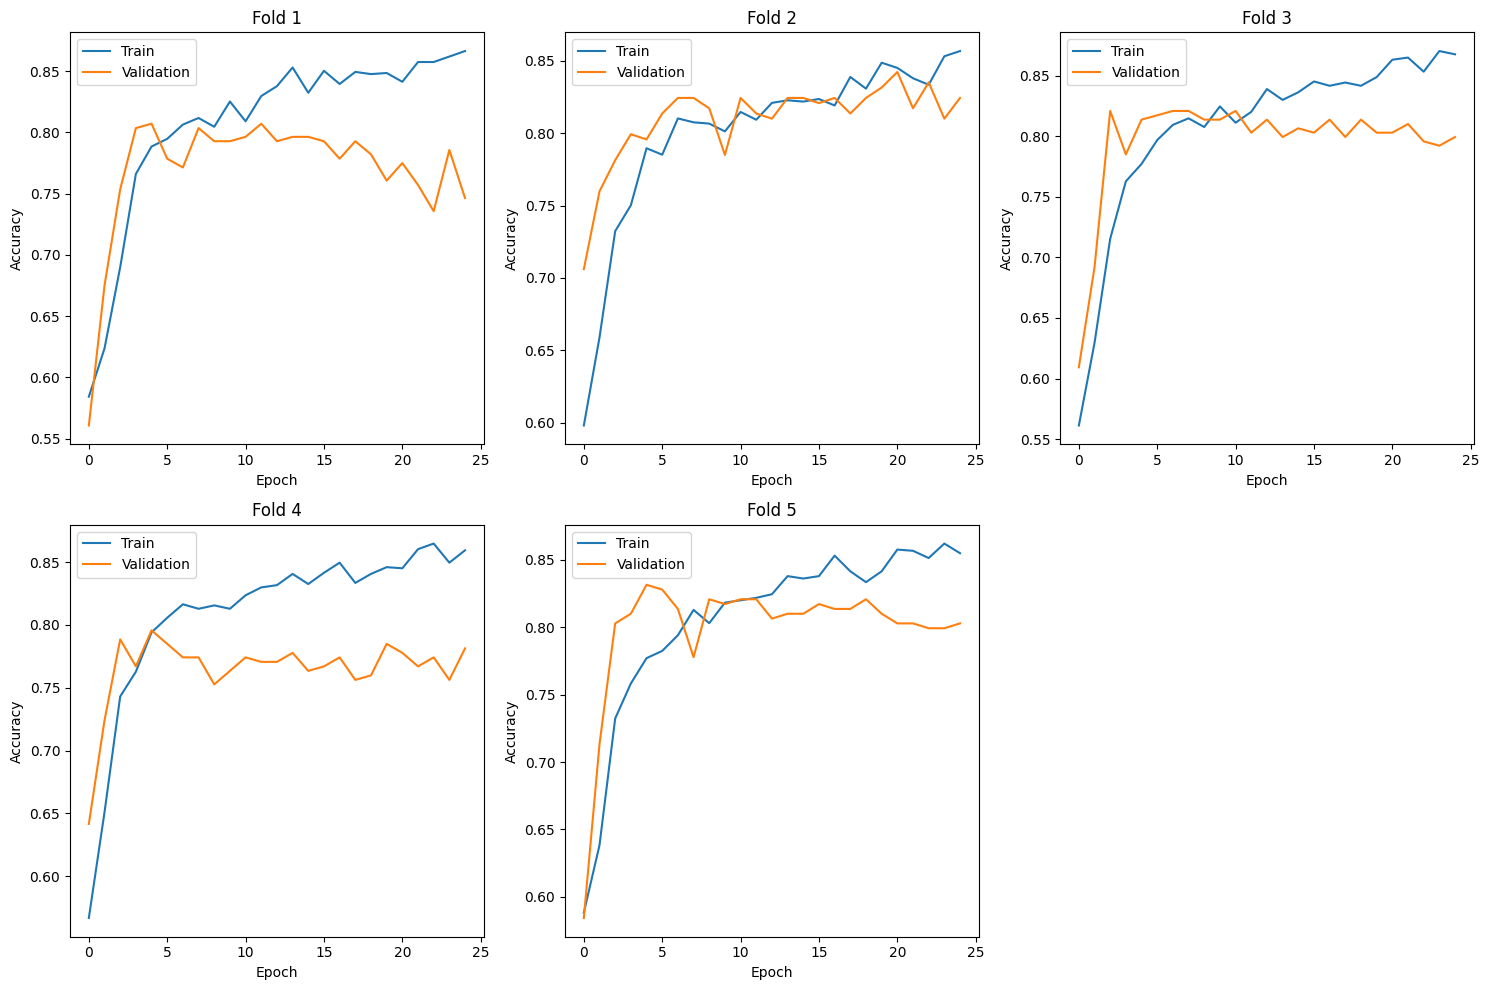


Testing with L2 lambda: 0.0006

Fold 1
Fold 1 accuracy: 0.7679

Fold 2
Fold 2 accuracy: 0.8029

Fold 3
Fold 3 accuracy: 0.7957

Fold 4
Fold 4 accuracy: 0.7527

Fold 5
Fold 5 accuracy: 0.7885

Mean accuracy: 0.7815 (+/- 0.0186)


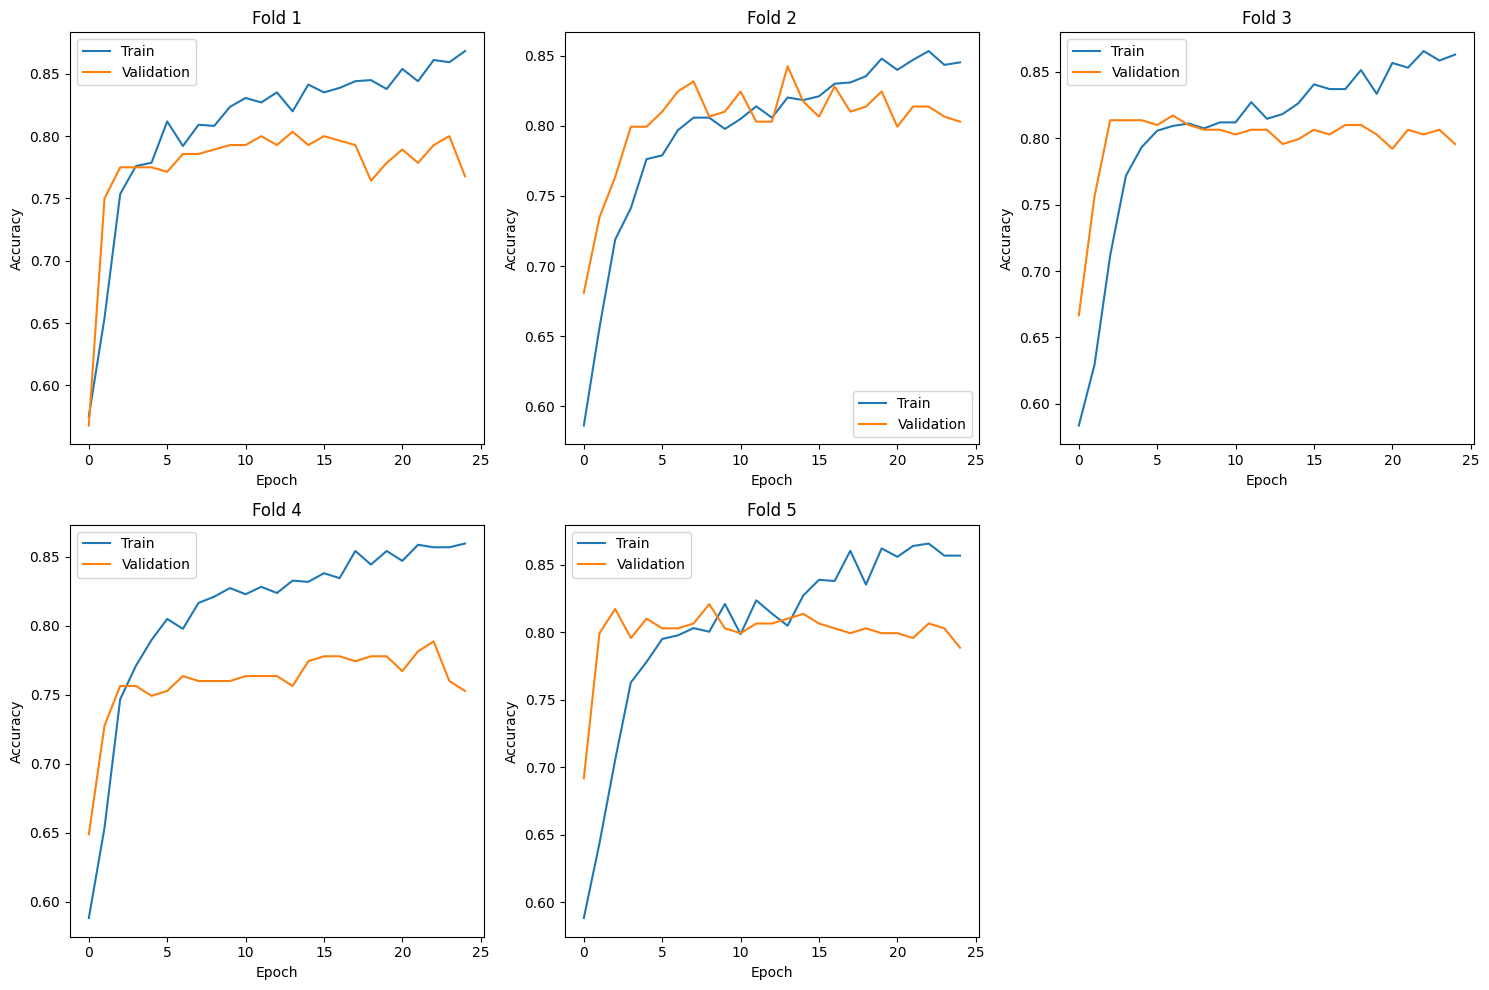


Testing with L2 lambda: 0.00065

Fold 1
Fold 1 accuracy: 0.7786

Fold 2
Fold 2 accuracy: 0.8100

Fold 3
Fold 3 accuracy: 0.7849

Fold 4
Fold 4 accuracy: 0.7599

Fold 5
Fold 5 accuracy: 0.8172

Mean accuracy: 0.7901 (+/- 0.0210)


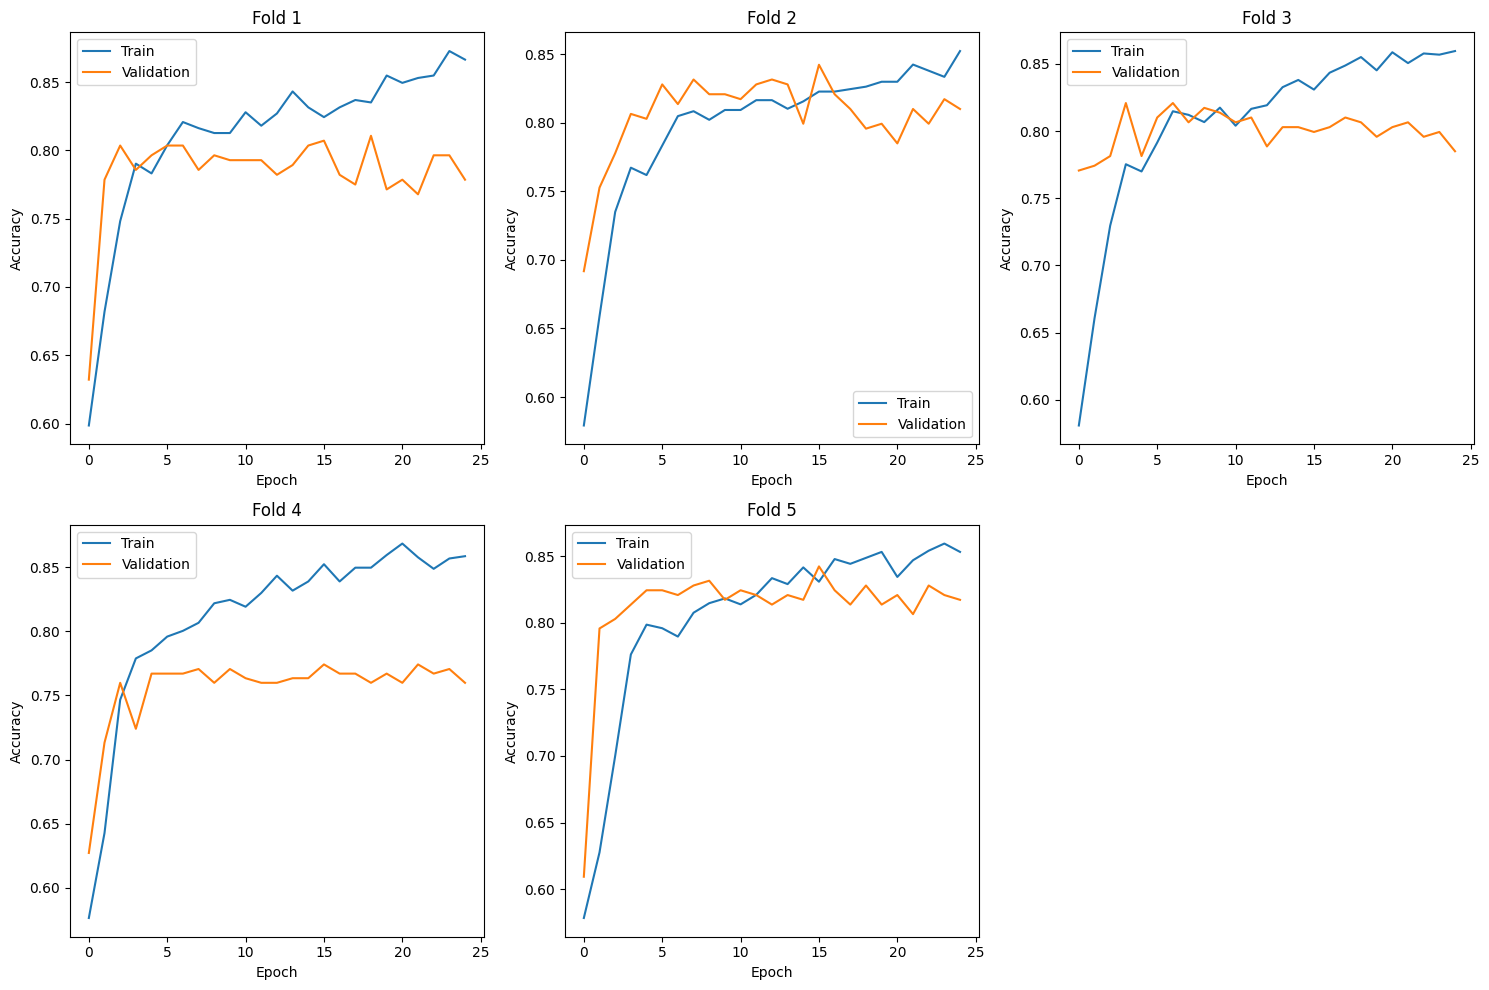

In [50]:




import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import KFold
import numpy as np

learning_rate=0.001
dropout=0.4
hidden_layer_neurones=128
hidden_layers=4
batch_size=30
# "accuracy_test": 0.8497854077253219
l2_lambda_values = [0.0005, 0.00055, 0.0006, 0.00065]

def create_model(input_dim, hidden_layers=5, hidden_layer_neurons=64, dropout=0.5, learning_rate=0.003, l2_lambda=0.0001):
    model = Sequential()
    
    # Input layer
    model.add(Dense(hidden_layer_neurons, input_dim=input_dim, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(Dropout(dropout))
    
    # Hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_layer_neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
        model.add(Dropout(dropout))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_lambda)))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

def nn_kfold_cv(X, y, n_splits=5, epochs=25, batch_size=64, **model_params):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    histories = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y), 1):
        print(f'\nFold {fold}')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = create_model(input_dim=X.shape[1], **model_params)

        history = model.fit(X_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(X_val, y_val),
                            verbose=0)
        
        scores.append(model.evaluate(X_val, y_val, verbose=0)[1])
        histories.append(history)

        print(f'Fold {fold} accuracy: {scores[-1]:.4f}')

    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)
    print(f'\nMean accuracy: {mean_accuracy:.4f} (+/- {std_accuracy:.4f})')

    return scores, histories




for l2_lambda in l2_lambda_values:
    print(f"\nTesting with L2 lambda: {l2_lambda}")
    scores, histories = nn_kfold_cv(X_train_sc, y_train,
                                    n_splits=5,
                                    hidden_layers=hidden_layers, hidden_layer_neurons=hidden_layer_neurones, dropout=dropout, 
                                    batch_size=30, 
                                    learning_rate=learning_rate, 
                                    l2_lambda=l2_lambda,
                                    epochs=25
                                    )
                                
    # Plotting learning curves

    plt.figure(figsize=(15, 10))
    for i, history in enumerate(histories, 1):
        plt.subplot(2, 3, i)
        plt.plot(history.history['accuracy'], label='Train')
        plt.plot(history.history['val_accuracy'], label='Validation')
        plt.title(f'Fold {i}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()






From the results above L2 of 0.00055 is marginally better, so I will use this in the next model. 

Below is implementation of several methods to fine tune the model

/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model 1 trained. Final validation accuracy: 0.8036
Model 2 trained. Final validation accuracy: 0.7893
Model 3 trained. Final validation accuracy: 0.7929
Model 4 trained. Final validation accuracy: 0.8000
Model 5 trained. Final validation accuracy: 0.7964
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Ensemble Accuracy on Test Set: 0.8176


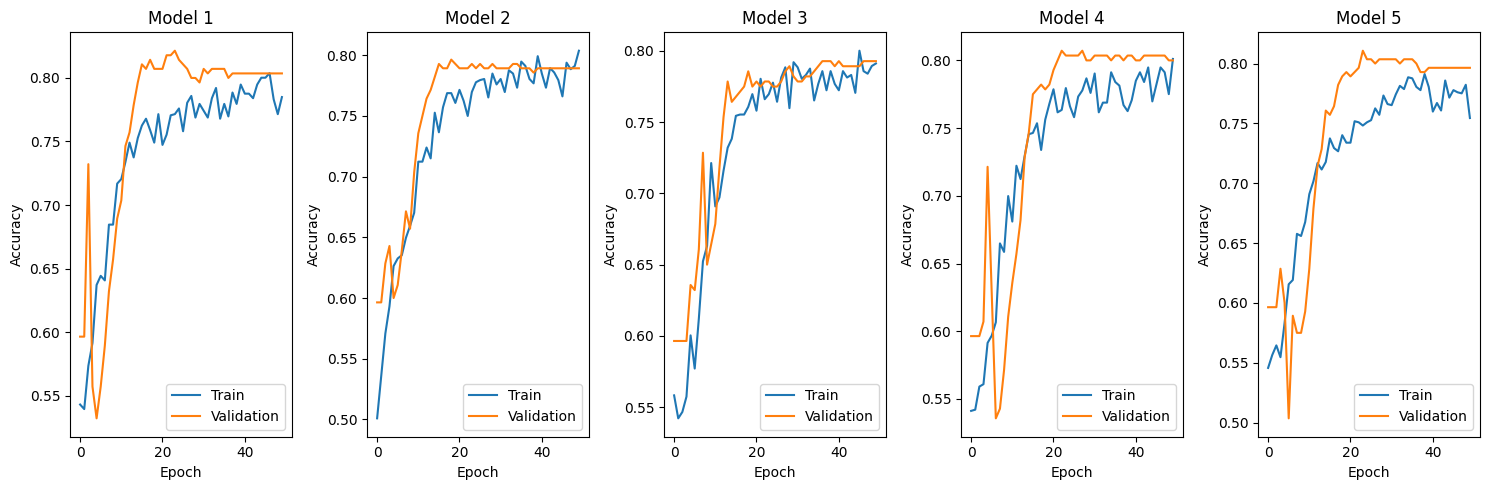

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

def create_advanced_model(input_dim, hidden_layers=5, hidden_layer_neurons=64, dropout=0.5, l2_lambda=0.00055):
    model = Sequential()
    
    # Input layer
    model.add(Dense(hidden_layer_neurons, input_dim=input_dim, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    # Hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_layer_neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    return model

def lr_schedule(epoch):
    initial_lr = 0.003
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * (drop ** np.floor((1 + epoch) / epochs_drop))
    return lr

def train_with_ensemble(X, y, n_models=5, **model_params):
    models = []
    histories = []
    
    for i in range(n_models):
        model = create_advanced_model(input_dim=X.shape[1], **model_params)
        optimizer = Adam(learning_rate=lr_schedule(0))
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        
        history = model.fit(
            X, y,
            epochs=50,
            batch_size=64,
            validation_split=0.2,
            callbacks=[LearningRateScheduler(lr_schedule)],
            verbose=0
        )
        
        models.append(model)
        histories.append(history)
        
        print(f"Model {i+1} trained. Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
    
    return models, histories

# Usage
models, histories = train_with_ensemble(X_train_sc, y_train,
                                        n_models=5,
                                        hidden_layers=5,
                                        hidden_layer_neurons=64,
                                        dropout=0.5,
                                        l2_lambda=0.0005)

# Make predictions using the ensemble
def ensemble_predict(models, X):
    predictions = np.array([model.predict(X).ravel() for model in models])
    return np.mean(predictions, axis=0)

# Evaluate ensemble on test set
y_pred_proba = ensemble_predict(models, X_test_sc)
y_pred = (y_pred_proba > 0.5).astype(int)
ensemble_accuracy = np.mean(y_pred == y_test)
print(f"Ensemble Accuracy on Test Set: {ensemble_accuracy:.4f}")

# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i, history in enumerate(histories):
    plt.subplot(1, 5, i+1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Model {i+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

Below is an implementation of Bayesian optimisation to fine tune the model

Something is wrong with above. try again below

Failed! Try again below

failed again! Try again below

failed again! Try again below

In [64]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def create_model(meta, hidden_layers=2, neurons=64, dropout=0.3, learning_rate=0.001):
    n_features_in_ = meta["n_features_in_"]
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(n_features_in_,)))
    model.add(Dropout(dropout))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Import, split, scale data. 
data = pd.read_csv('data/hsma_stroke.csv')
data = data.astype(float)
X = data.drop('Clotbuster given', axis=1)
y = data['Clotbuster given']
X_np = X.values
y_np = y.values

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_np, y_np, test_size=0.2, random_state=42)

X_train, X_test = scale_data(X_train_raw, X_test_raw)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Wrap the model, passing create_model without calling it
model = KerasClassifier(
    model=create_model,
    hidden_layers=2,
    neurons=64,
    dropout=0.3,
    learning_rate=0.001,
    verbose=0
)

# Define the search space
search_spaces = {
    'hidden_layers': Integer(1, 5),
    'neurons': Integer(32, 256),
    'dropout': Real(0.1, 0.5),
    'learning_rate': Real(1e-4, 1e-2, prior='log-uniform'),
    'batch_size': Integer(32, 256),
    'epochs': Integer(10, 100)
}

# Set up the BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=search_spaces,
    n_iter=25,
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Perform the search
bayes_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", bayes_search.best_params_)
print("Best score found: ", bayes_search.best_score_)

# Evaluate the best model
best_model = bayes_search.best_estimator_
score = best_model.score(X_val, y_val)
print(f"Validation score of the best model: {score:.4f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=118, dropout=0.2445210169376222, epochs=27, hidden_layers=2, learning_rate=0.00030918417964988606, neurons=168; total time=   5.2s
[CV] END batch_size=118, dropout=0.2445210169376222, epochs=27, hidden_layers=2, learning_rate=0.00030918417964988606, neurons=168; total time=   5.2s
[CV] END batch_size=118, dropout=0.2445210169376222, epochs=27, hidden_layers=2, learning_rate=0.00030918417964988606, neurons=168; total time=   5.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=142, dropout=0.21753644368132757, epochs=77, hidden_layers=4, learning_rate=0.0004625941821588636, neurons=243; total time=  10.6s
[CV] END batch_size=142, dropout=0.21753644368132757, epochs=77, hidden_layers=4, learning_rate=0.0004625941821588636, neurons=243; total time=  10.6s
[CV] END batch_size=142, dropout=0.21753644368132757, epochs=77, hidden_layers=4, learning_rate=0.0004625941821588636, neurons=243; total time=  10.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=193, dropout=0.4936579704204279, epochs=50, hidden_layers=2, learning_rate=0.0018392980625671629, neurons=191; total time=   4.1s
[CV] END batch_size=193, dropout=0.4936579704204279, epochs=50, hidden_layers=2, learning_rate=0.0018392980625671629, neurons=191; total time=   6.2s
[CV] END batch_size=193, dropout=0.4936579704204279, epochs=50, hidden_layers=2, learning_rate=0.0018392980625671629, neurons=191; total time=   6.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=186, dropout=0.32364828385557376, epochs=16, hidden_layers=3, learning_rate=0.002312811937773662, neurons=200; total time=   2.0s
[CV] END batch_size=186, dropout=0.32364828385557376, epochs=16, hidden_layers=3, learning_rate=0.002312811937773662, neurons=200; total time=   2.6s


2024-07-21 17:14:07.020277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


[CV] END batch_size=186, dropout=0.32364828385557376, epochs=16, hidden_layers=3, learning_rate=0.002312811937773662, neurons=200; total time=   4.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=33, dropout=0.10864603411792717, epochs=93, hidden_layers=1, learning_rate=0.00018840139822527604, neurons=198; total time=  17.4s
[CV] END batch_size=33, dropout=0.10864603411792717, epochs=93, hidden_layers=1, learning_rate=0.00018840139822527604, neurons=198; total time=  19.9s
[CV] END batch_size=33, dropout=0.10864603411792717, epochs=93, hidden_layers=1, learning_rate=0.00018840139822527604, neurons=198; total time=  20.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=47, dropout=0.13976893513967464, epochs=64, hidden_layers=4, learning_rate=0.00020132785093609012, neurons=145; total time=  14.4s
[CV] END batch_size=47, dropout=0.13976893513967464, epochs=64, hidden_layers=4, learning_rate=0.00020132785093609012, neurons=145; total time=  14.4s
[CV] END batch_size=47, dropout=0.13976893513967464, epochs=64, hidden_layers=4, learning_rate=0.00020132785093609012, neurons=145; total time=  14.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-21 17:14:49.850760: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-07-21 17:14:49.850790: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2024-07-21 17:14:49.850795: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2024-07-21 17:14:49.850824: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-21 17:14:49.850836: I tensorflow/core/common_runtime/pluggable_device/plugg

[CV] END batch_size=65, dropout=0.15384848296533316, epochs=34, hidden_layers=4, learning_rate=0.0011578283358695714, neurons=149; total time=   8.0s
[CV] END batch_size=65, dropout=0.15384848296533316, epochs=34, hidden_layers=4, learning_rate=0.0011578283358695714, neurons=149; total time=   8.0s
[CV] END batch_size=65, dropout=0.15384848296533316, epochs=34, hidden_layers=4, learning_rate=0.0011578283358695714, neurons=149; total time=   8.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=141, dropout=0.34652762128090064, epochs=43, hidden_layers=2, learning_rate=0.00012922040557422626, neurons=149; total time=   3.4s
[CV] END batch_size=141, dropout=0.34652762128090064, epochs=43, hidden_layers=2, learning_rate=0.00012922040557422626, neurons=149; total time=   3.4s
[CV] END batch_size=141, dropout=0.34652762128090064, epochs=43, hidden_layers=2, learning_rate=0.00012922040557422626, neurons=149; total time=   3.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=65, dropout=0.4956554733458839, epochs=39, hidden_layers=3, learning_rate=0.0016734797221737588, neurons=196; total time=   8.0s
[CV] END batch_size=65, dropout=0.4956554733458839, epochs=39, hidden_layers=3, learning_rate=0.0016734797221737588, neurons=196; total time=   8.6s
[CV] END batch_size=65, dropout=0.4956554733458839, epochs=39, hidden_layers=3, learning_rate=0.0016734797221737588, neurons=196; total time=   7.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=169, dropout=0.29760448496610636, epochs=77, hidden_layers=2, learning_rate=0.0011646566680833348, neurons=216; total time=   4.9s
[CV] END batch_size=169, dropout=0.29760448496610636, epochs=77, hidden_layers=2, learning_rate=0.0011646566680833348, neurons=216; total time=   4.9s


[CV] END batch_size=169, dropout=0.29760448496610636, epochs=77, hidden_layers=2, learning_rate=0.0011646566680833348, neurons=216; total time=   5.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=100, dropout=0.4870195174047127, epochs=32, hidden_layers=2, learning_rate=0.004896092485765073, neurons=97; total time=   4.0s
[CV] END batch_size=100, dropout=0.4870195174047127, epochs=32, hidden_layers=2, learning_rate=0.004896092485765073, neurons=97; total time=   6.2s
[CV] END batch_size=100, dropout=0.4870195174047127, epochs=32, hidden_layers=2, learning_rate=0.004896092485765073, neurons=97; total time=   6.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=203, dropout=0.15800940533564634, epochs=10, hidden_layers=3, learning_rate=0.0017364548032455843, neurons=256; total time=   2.0s
[CV] END batch_size=203, dropout=0.15800940533564634, epochs=10, hidden_layers=3, learning_rate=0.0017364548032455843, neurons=256; total time=   2.2s
[CV] END batch_size=203, dropout=0.15800940533564634, epochs=10, hidden_layers=3, learning_rate=0.0017364548032455843, neurons=256; total time=   2.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=96, dropout=0.20641028379569282, epochs=10, hidden_layers=3, learning_rate=0.0006665604723461422, neurons=138; total time=   2.6s
[CV] END batch_size=96, dropout=0.20641028379569282, epochs=10, hidden_layers=3, learning_rate=0.0006665604723461422, neurons=138; total time=   2.6s
[CV] END batch_size=96, dropout=0.20641028379569282, epochs=10, hidden_layers=3, learning_rate=0.0006665604723461422, neurons=138; total time=   2.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=150, dropout=0.32767680993773907, epochs=44, hidden_layers=3, learning_rate=0.0012872894104137007, neurons=168; total time=   5.2s
[CV] END batch_size=150, dropout=0.32767680993773907, epochs=44, hidden_layers=3, learning_rate=0.0012872894104137007, neurons=168; total time=   5.2s
[CV] END batch_size=150, dropout=0.32767680993773907, epochs=44, hidden_layers=3, learning_rate=0.0012872894104137007, neurons=168; total time=   5.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=229, dropout=0.1528519323901134, epochs=34, hidden_layers=2, learning_rate=0.0001, neurons=256; total time=   3.2s
[CV] END batch_size=229, dropout=0.1528519323901134, epochs=34, hidden_layers=2, learning_rate=0.0001, neurons=256; total time=   3.2s
[CV] END batch_size=229, dropout=0.1528519323901134, epochs=34, hidden_layers=2, learning_rate=0.0001, neurons=256; total time=   3.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=113, dropout=0.34622312061356164, epochs=70, hidden_layers=1, learning_rate=0.0010845487459647423, neurons=114; total time=   5.4s
[CV] END batch_size=113, dropout=0.34622312061356164, epochs=70, hidden_layers=1, learning_rate=0.0010845487459647423, neurons=114; total time=   5.4s
[CV] END batch_size=113, dropout=0.34622312061356164, epochs=70, hidden_layers=1, learning_rate=0.0010845487459647423, neurons=114; total time=   7.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=214, dropout=0.22612922776391736, epochs=59, hidden_layers=1, learning_rate=0.00042078105371013823, neurons=226; total time=   3.1s


[CV] END batch_size=214, dropout=0.22612922776391736, epochs=59, hidden_layers=1, learning_rate=0.00042078105371013823, neurons=226; total time=   3.6s
[CV] END batch_size=214, dropout=0.22612922776391736, epochs=59, hidden_layers=1, learning_rate=0.00042078105371013823, neurons=226; total time=   3.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=198, dropout=0.17518561468362862, epochs=34, hidden_layers=1, learning_rate=0.0003275106800110671, neurons=196; total time=   3.3s
[CV] END batch_size=198, dropout=0.17518561468362862, epochs=34, hidden_layers=1, learning_rate=0.0003275106800110671, neurons=196; total time=   3.4s
[CV] END batch_size=198, dropout=0.17518561468362862, epochs=34, hidden_layers=1, learning_rate=0.0003275106800110671, neurons=196; total time=   5.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=194, dropout=0.4052741323030884, epochs=69, hidden_layers=1, learning_rate=0.006558444745234414, neurons=248; total time=   4.1s
[CV] END batch_size=194, dropout=0.4052741323030884, epochs=69, hidden_layers=1, learning_rate=0.006558444745234414, neurons=248; total time=   4.1s
[CV] END batch_size=194, dropout=0.4052741323030884, epochs=69, hidden_layers=1, learning_rate=0.006558444745234414, neurons=248; total time=   4.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=103, dropout=0.3988772150130788, epochs=35, hidden_layers=2, learning_rate=0.00023822541782890524, neurons=79; total time=   3.7s
[CV] END batch_size=103, dropout=0.3988772150130788, epochs=35, hidden_layers=2, learning_rate=0.00023822541782890524, neurons=79; total time=   3.7s


[CV] END batch_size=103, dropout=0.3988772150130788, epochs=35, hidden_layers=2, learning_rate=0.00023822541782890524, neurons=79; total time=   4.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=165, dropout=0.2666840115795669, epochs=10, hidden_layers=3, learning_rate=0.00010025015698267543, neurons=52; total time=   2.0s
[CV] END batch_size=165, dropout=0.2666840115795669, epochs=10, hidden_layers=3, learning_rate=0.00010025015698267543, neurons=52; total time=   2.0s


[CV] END batch_size=165, dropout=0.2666840115795669, epochs=10, hidden_layers=3, learning_rate=0.00010025015698267543, neurons=52; total time=   2.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=224, dropout=0.4377142961831667, epochs=67, hidden_layers=1, learning_rate=0.000261383165869947, neurons=140; total time=   3.6s
[CV] END batch_size=224, dropout=0.4377142961831667, epochs=67, hidden_layers=1, learning_rate=0.000261383165869947, neurons=140; total time=   3.6s
[CV] END batch_size=224, dropout=0.4377142961831667, epochs=67, hidden_layers=1, learning_rate=0.000261383165869947, neurons=140; total time=   5.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=180, dropout=0.15306934404523612, epochs=13, hidden_layers=3, learning_rate=0.0001, neurons=128; total time=   2.5s
[CV] END batch_size=180, dropout=0.15306934404523612, epochs=13, hidden_layers=3, learning_rate=0.0001, neurons=128; total time=   2.8s
[CV] END batch_size=180, dropout=0.15306934404523612, epochs=13, hidden_layers=3, learning_rate=0.0001, neurons=128; total time=   3.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=78, dropout=0.5, epochs=100, hidden_layers=1, learning_rate=0.00018834481686557067, neurons=32; total time=   9.8s
[CV] END batch_size=78, dropout=0.5, epochs=100, hidden_layers=1, learning_rate=0.00018834481686557067, neurons=32; total time=   9.8s


[CV] END batch_size=78, dropout=0.5, epochs=100, hidden_layers=1, learning_rate=0.00018834481686557067, neurons=32; total time=  10.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

[CV] END batch_size=143, dropout=0.40214026414862303, epochs=40, hidden_layers=3, learning_rate=0.008213120909439814, neurons=221; total time=   4.1s
[CV] END batch_size=143, dropout=0.40214026414862303, epochs=40, hidden_layers=3, learning_rate=0.008213120909439814, neurons=221; total time=   4.1s
[CV] END batch_size=143, dropout=0.40214026414862303, epochs=40, hidden_layers=3, learning_rate=0.008213120909439814, neurons=221; total time=   5.3s


/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters found:  OrderedDict([('batch_size', 214), ('dropout', 0.22612922776391736), ('epochs', 59), ('hidden_layers', 1), ('learning_rate', 0.00042078105371013823), ('neurons', 226)])
Best score found:  0.8144416456759026
Validation score of the best model: 0.7785


Estimate how well our model can learn and if it woudl benefit from more data

/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf_hsma_macos/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inp

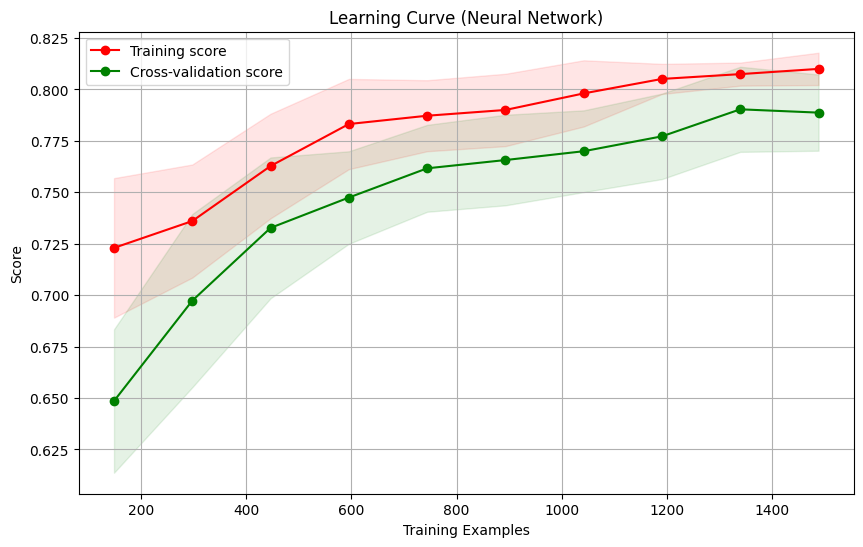

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# Load and prepare the data
data = pd.read_csv('./data/hsma_stroke.csv')
data = data.astype(float)
X = data.drop('Clotbuster given', axis=1)
y = data['Clotbuster given']

# Define the model creation function with optimized parameters
def create_model(meta):
    n_features_in_ = meta["n_features_in_"]
    model = Sequential([
        Dense(226, activation='relu', input_shape=(n_features_in_,)),
        Dropout(0.22612922776391736),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.00042078105371013823),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the KerasClassifier with optimized parameters
estimator = KerasClassifier(
    model=create_model,
    epochs=59,
    batch_size=214,
    verbose=0
)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy"
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Neural Network)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()